In [1]:
!pip3 install --upgrade torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 580.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 36.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0
    Uninstalling torchvision-0.14.0:
      Successfully uninstalled torchvision-0.14.0
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.0
    Uninstalling torchaudio-0.13.0:
      Successfully uninstalled torchaudio-0.13.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.3 MB/s et

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
ROBOFLOW_API_KEY = user_secrets.get_secret("ROBOFLOW_API")

from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("zzigmug").project("fruits-and-vegetables-knetf")
dataset = project.version(3).download("yolov8")

#project = rf.workspace("cse299").project("fruit-and-vegetable")
#dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.53, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Fruits-and-Vegetables-3 in yolov8:: 100%|██████████| 8778/8778 [00:02<00:00, 3690.26it/s]


In [5]:
!pip install --upgrade ultralytics

In [6]:
!cat /kaggle/working/Fruits-and-Vegetables-3/data.yaml

names:
- apple
- banana
- bell_pepper
- cabbage
- carrot
- chilli_pepper
- corn
- cucumber
- eggplant
- garlic
- grape
- kiwi
- lemon
- lettuce
- mango
- onion
- orange
- pineapple
- potato
- sweetpotato
- tomato
- watermelon
nc: 22
roboflow:
  license: Public Domain
  project: fruits-and-vegetables-knetf
  url: https://universe.roboflow.com/zzigmug/fruits-and-vegetables-knetf/dataset/3
  version: 3
  workspace: zzigmug
test: test/images
train: train/images
val: valid/images


In [7]:
!yolo task=detect mode=train epochs=50 data=/kaggle/working/Fruits-and-Vegetables-3/data.yaml model=yolov8m.pt patience=30

100%|██████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 79.3MB/s]
Ultralytics YOLOv8.0.53 🚀 Python-3.7.12 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/Fruits-and-Vegetables-3/data.yaml, epochs=50, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

In [ ]:
#!yolo task=detect mode=train resume model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/working/Fruits-and-Vegetables-3/data.yaml epochs=100

In [8]:
!ls /kaggle/working/runs/detect/train

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch9600.jpg
R_curve.png					   train_batch9601.jpg
args.yaml					   train_batch9602.jpg
confusion_matrix.png				   val_batch0_labels.jpg
events.out.tfevents.1678608237.d65eb7c0bc01.349.0  val_batch0_pred.jpg
labels.jpg					   val_batch1_labels.jpg
labels_correlogram.jpg				   val_batch1_pred.jpg
results.csv					   val_batch2_labels.jpg
results.png					   val_batch2_pred.jpg
train_batch0.jpg				   weights


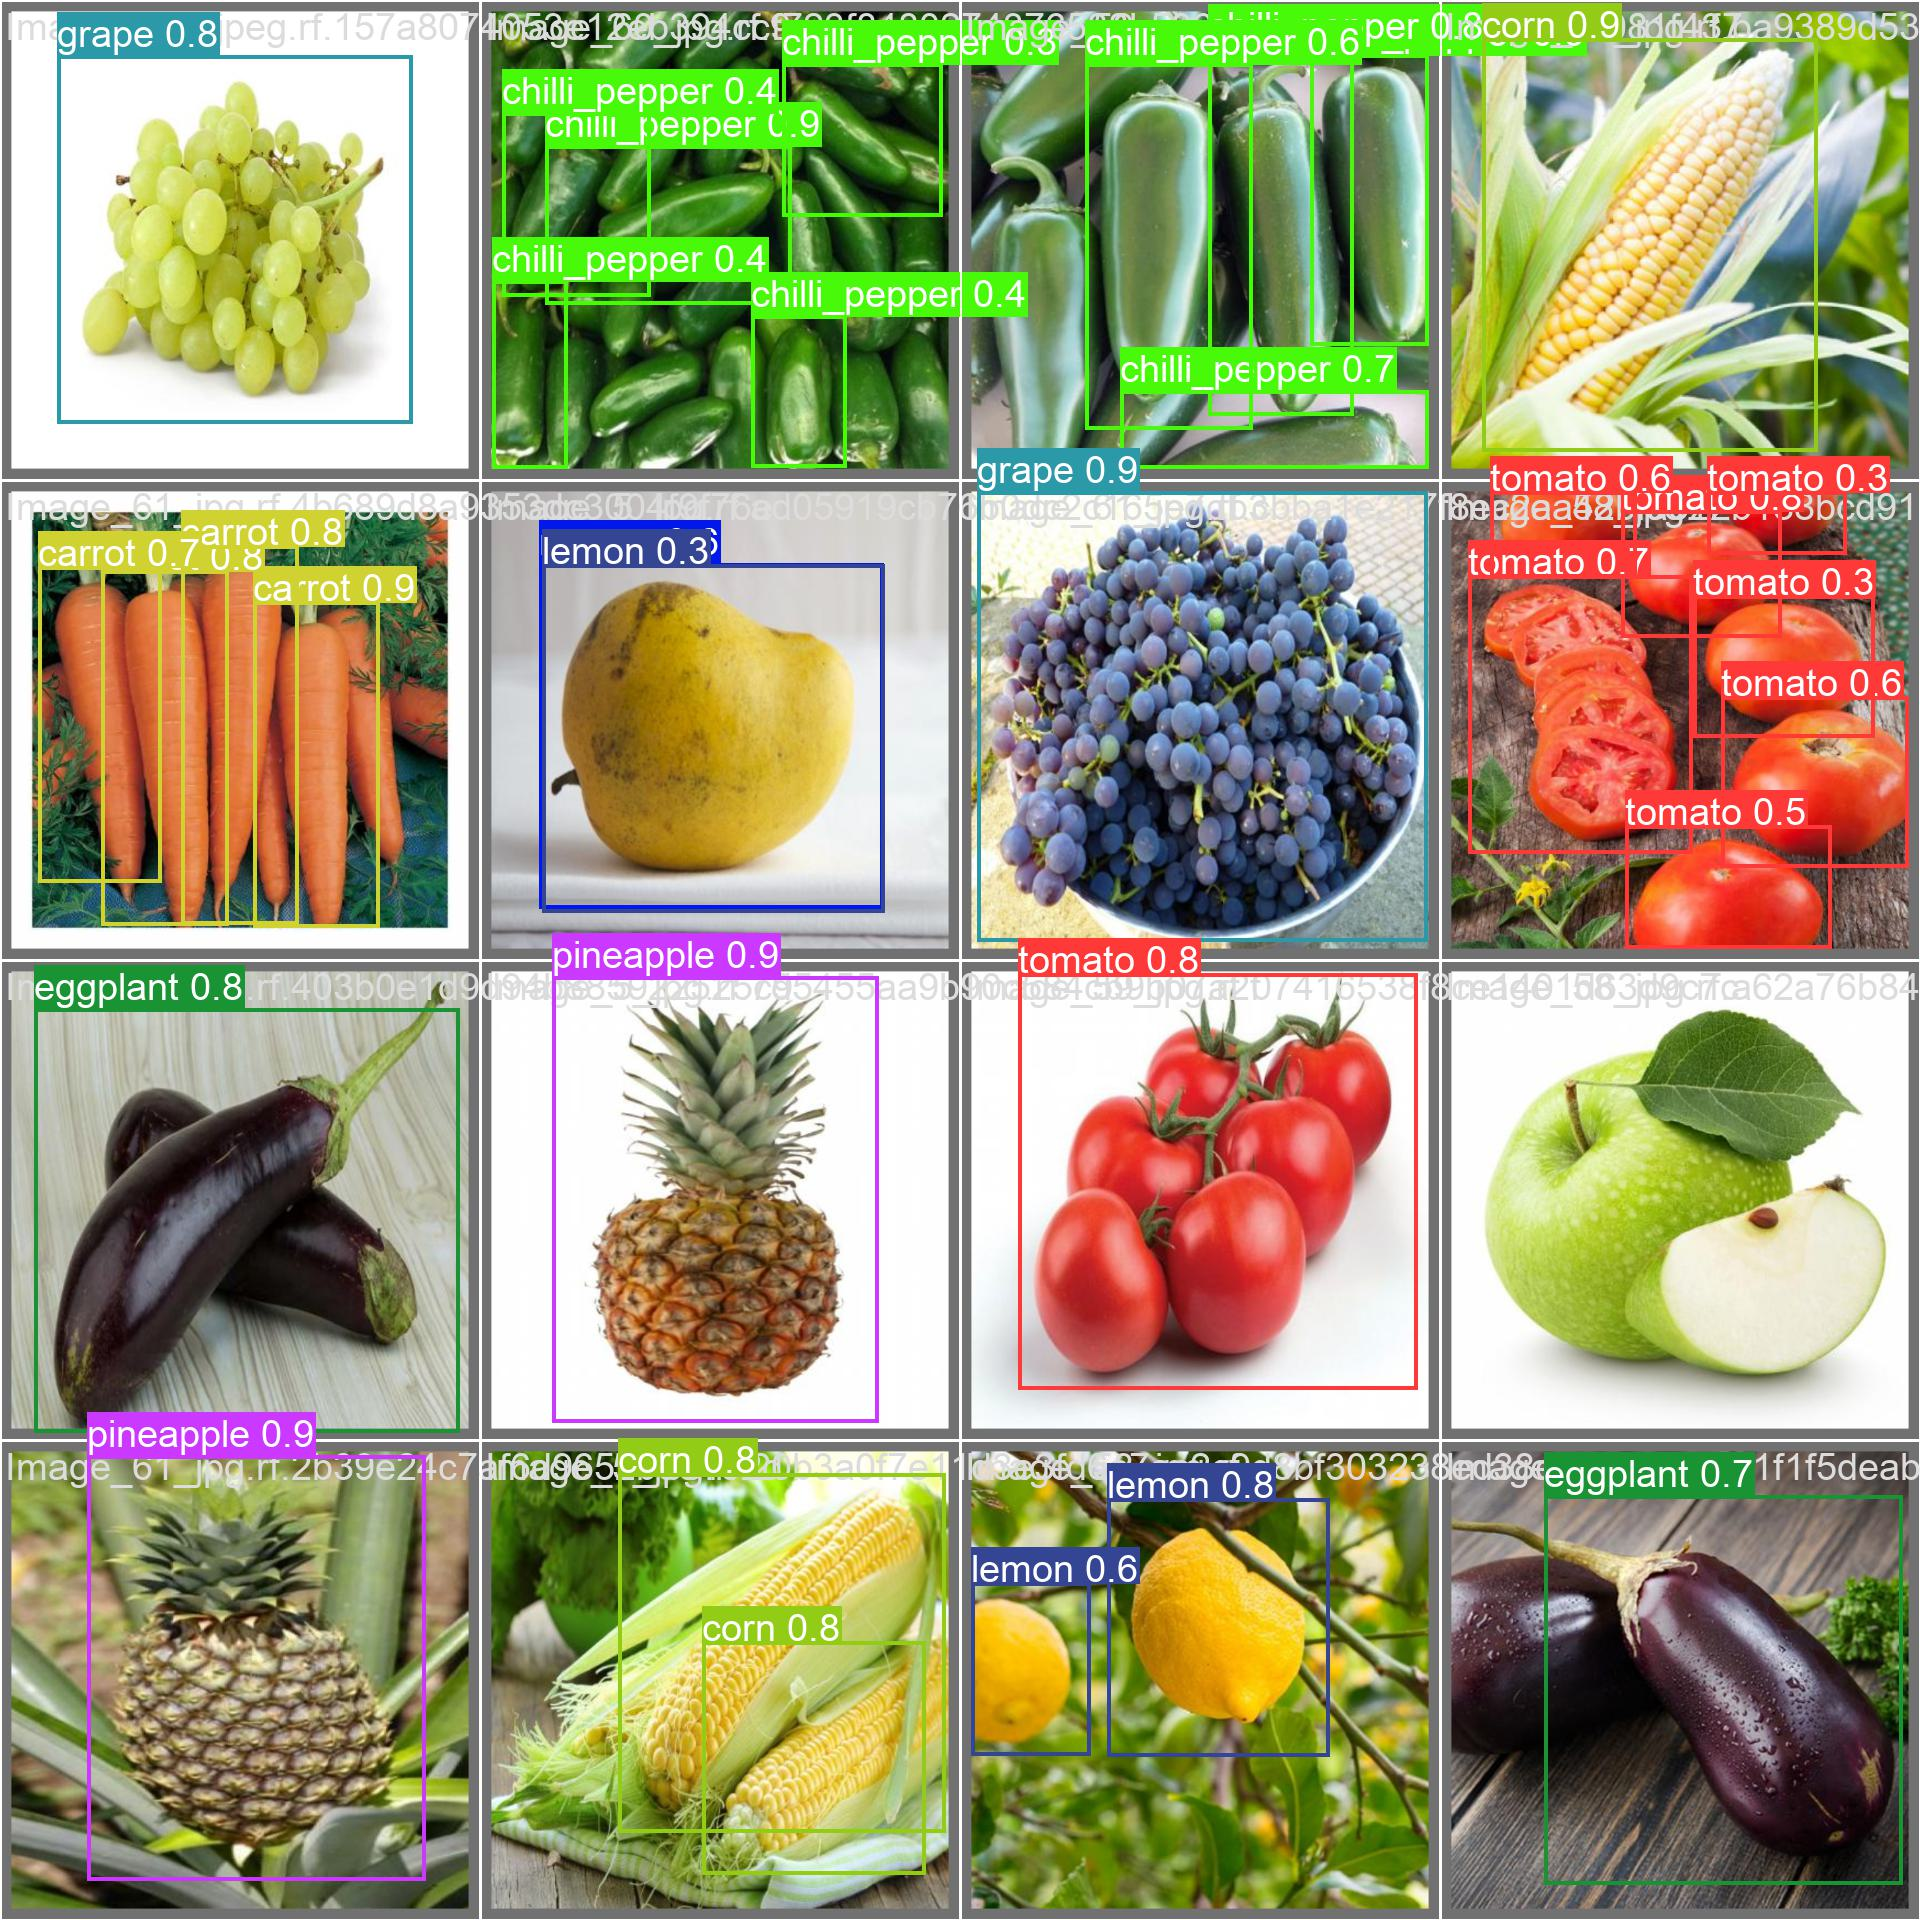

In [43]:
from IPython.display import display, Image

display(Image(filename='/kaggle/working/runs/detect/train/val_batch0_pred.jpg'))

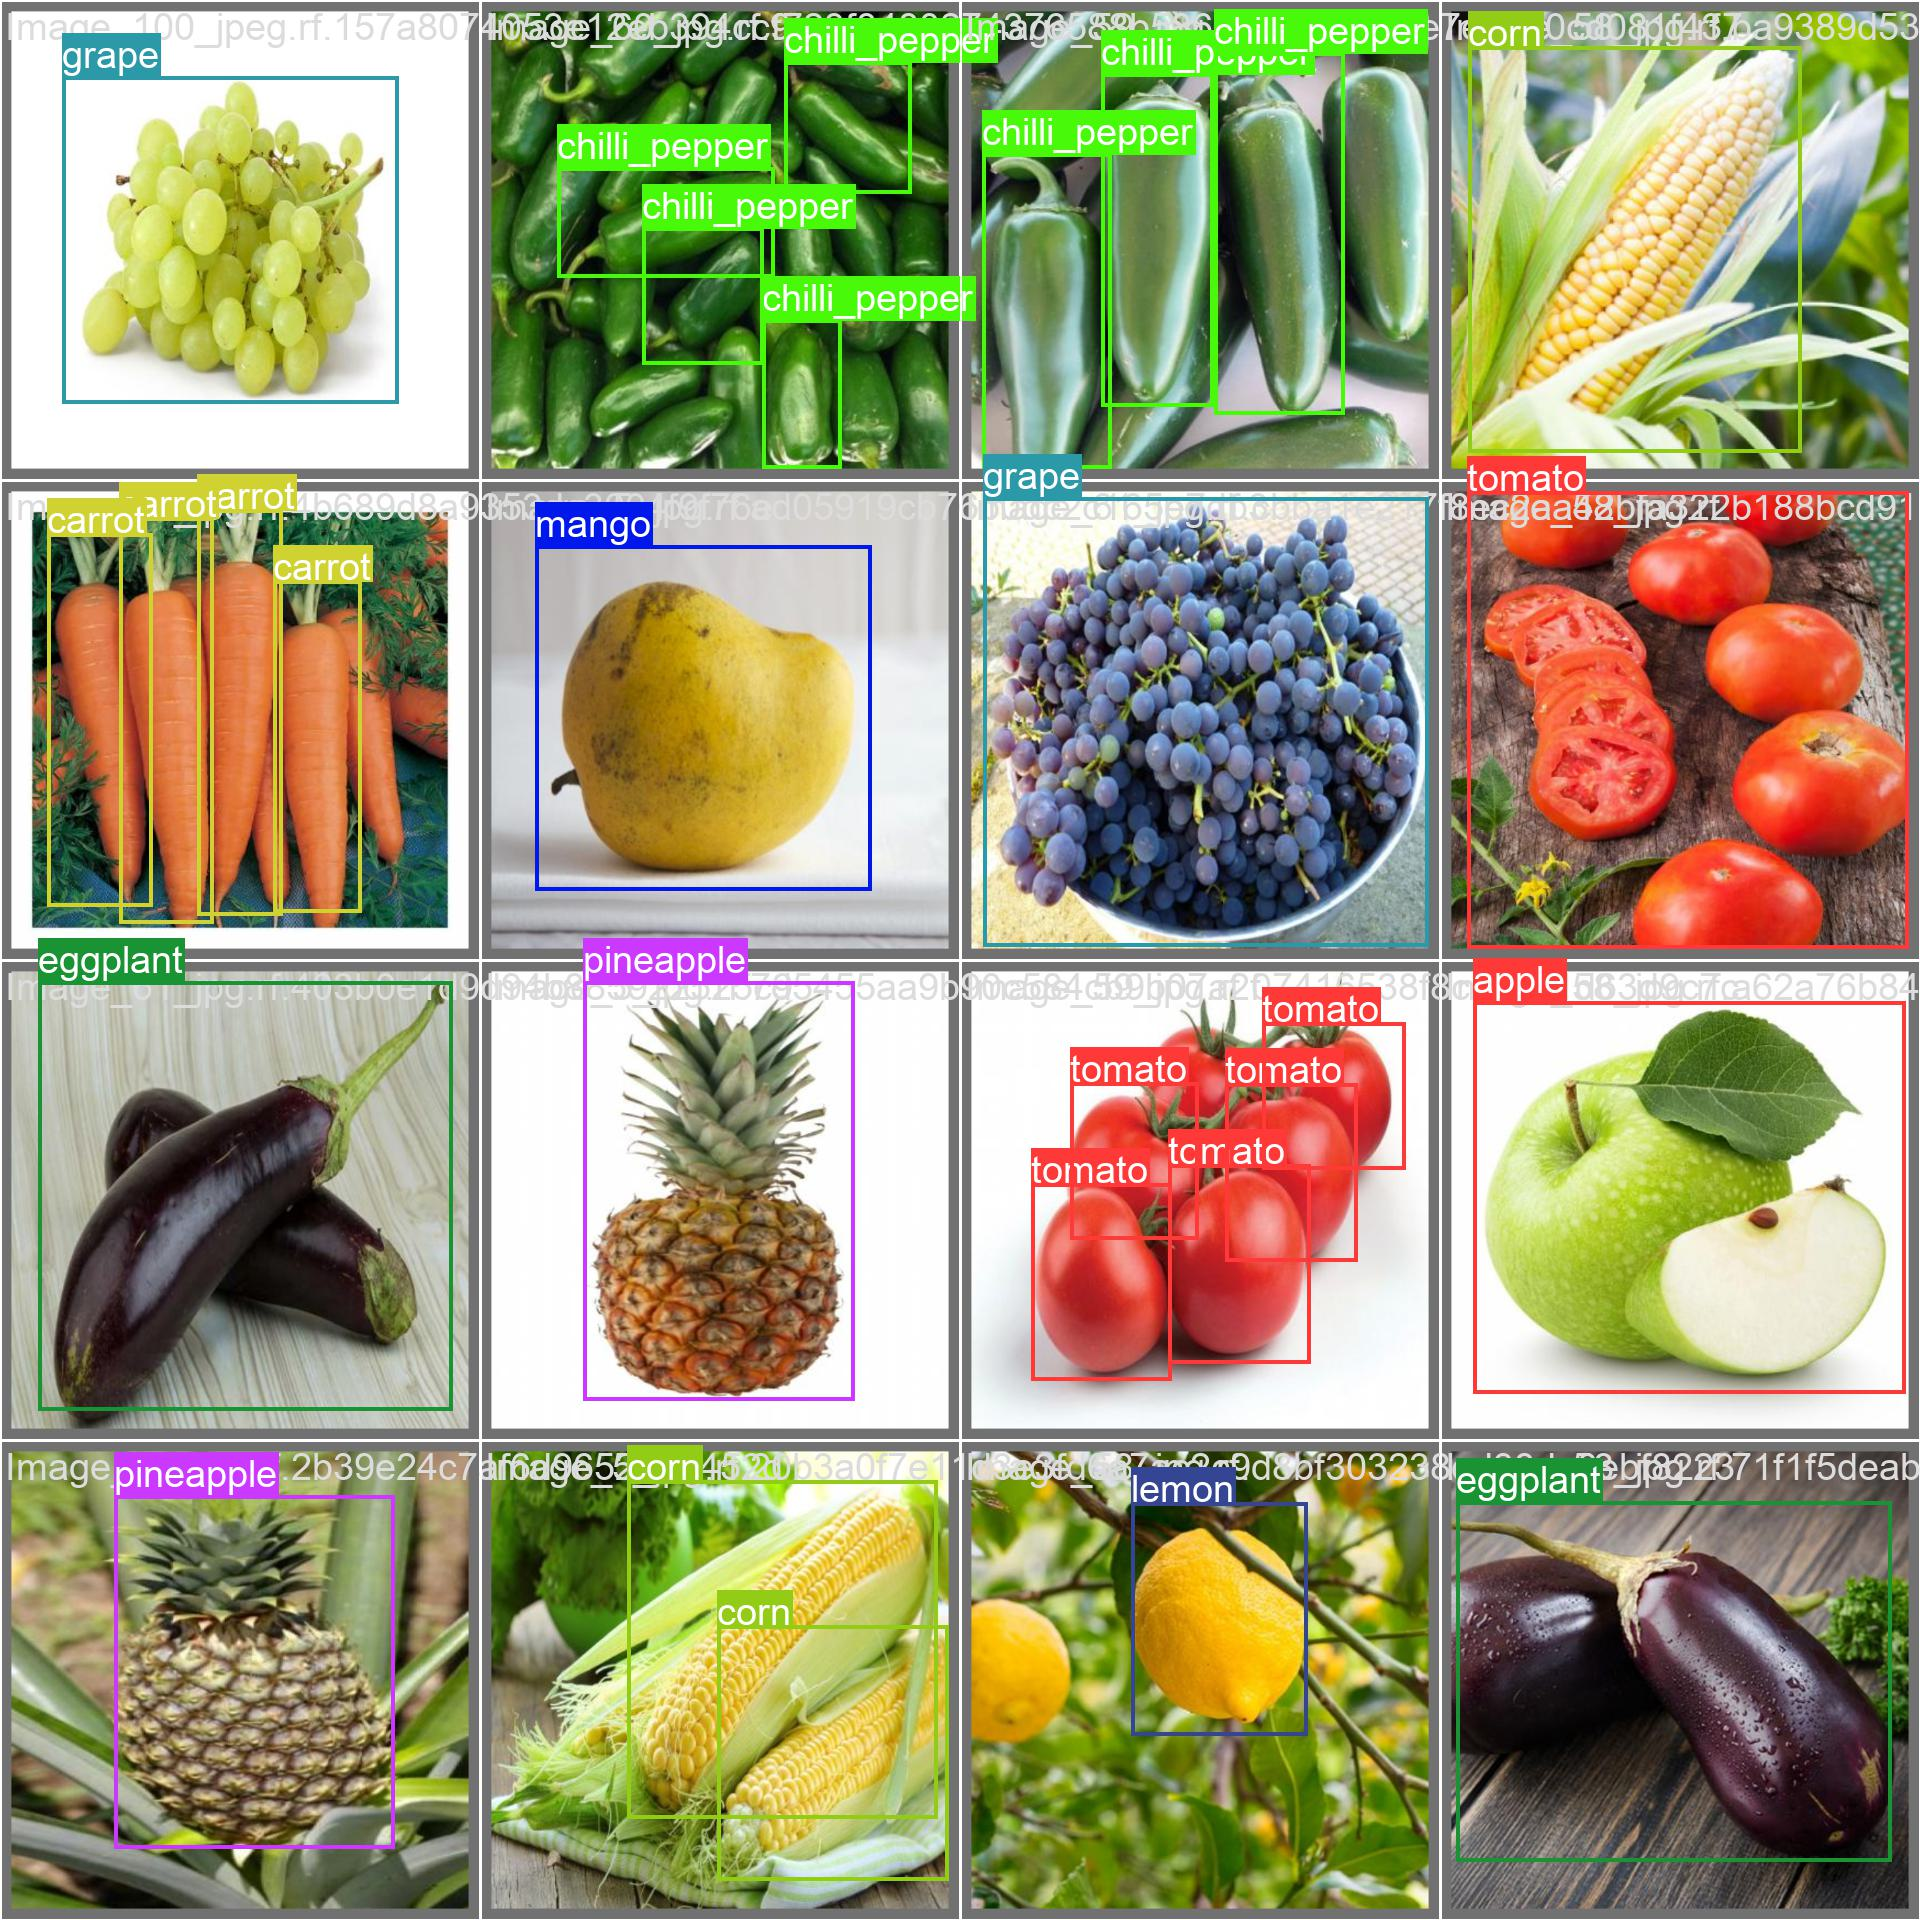

In [44]:
display(Image(filename='/kaggle/working/runs/detect/train/val_batch0_labels.jpg'))

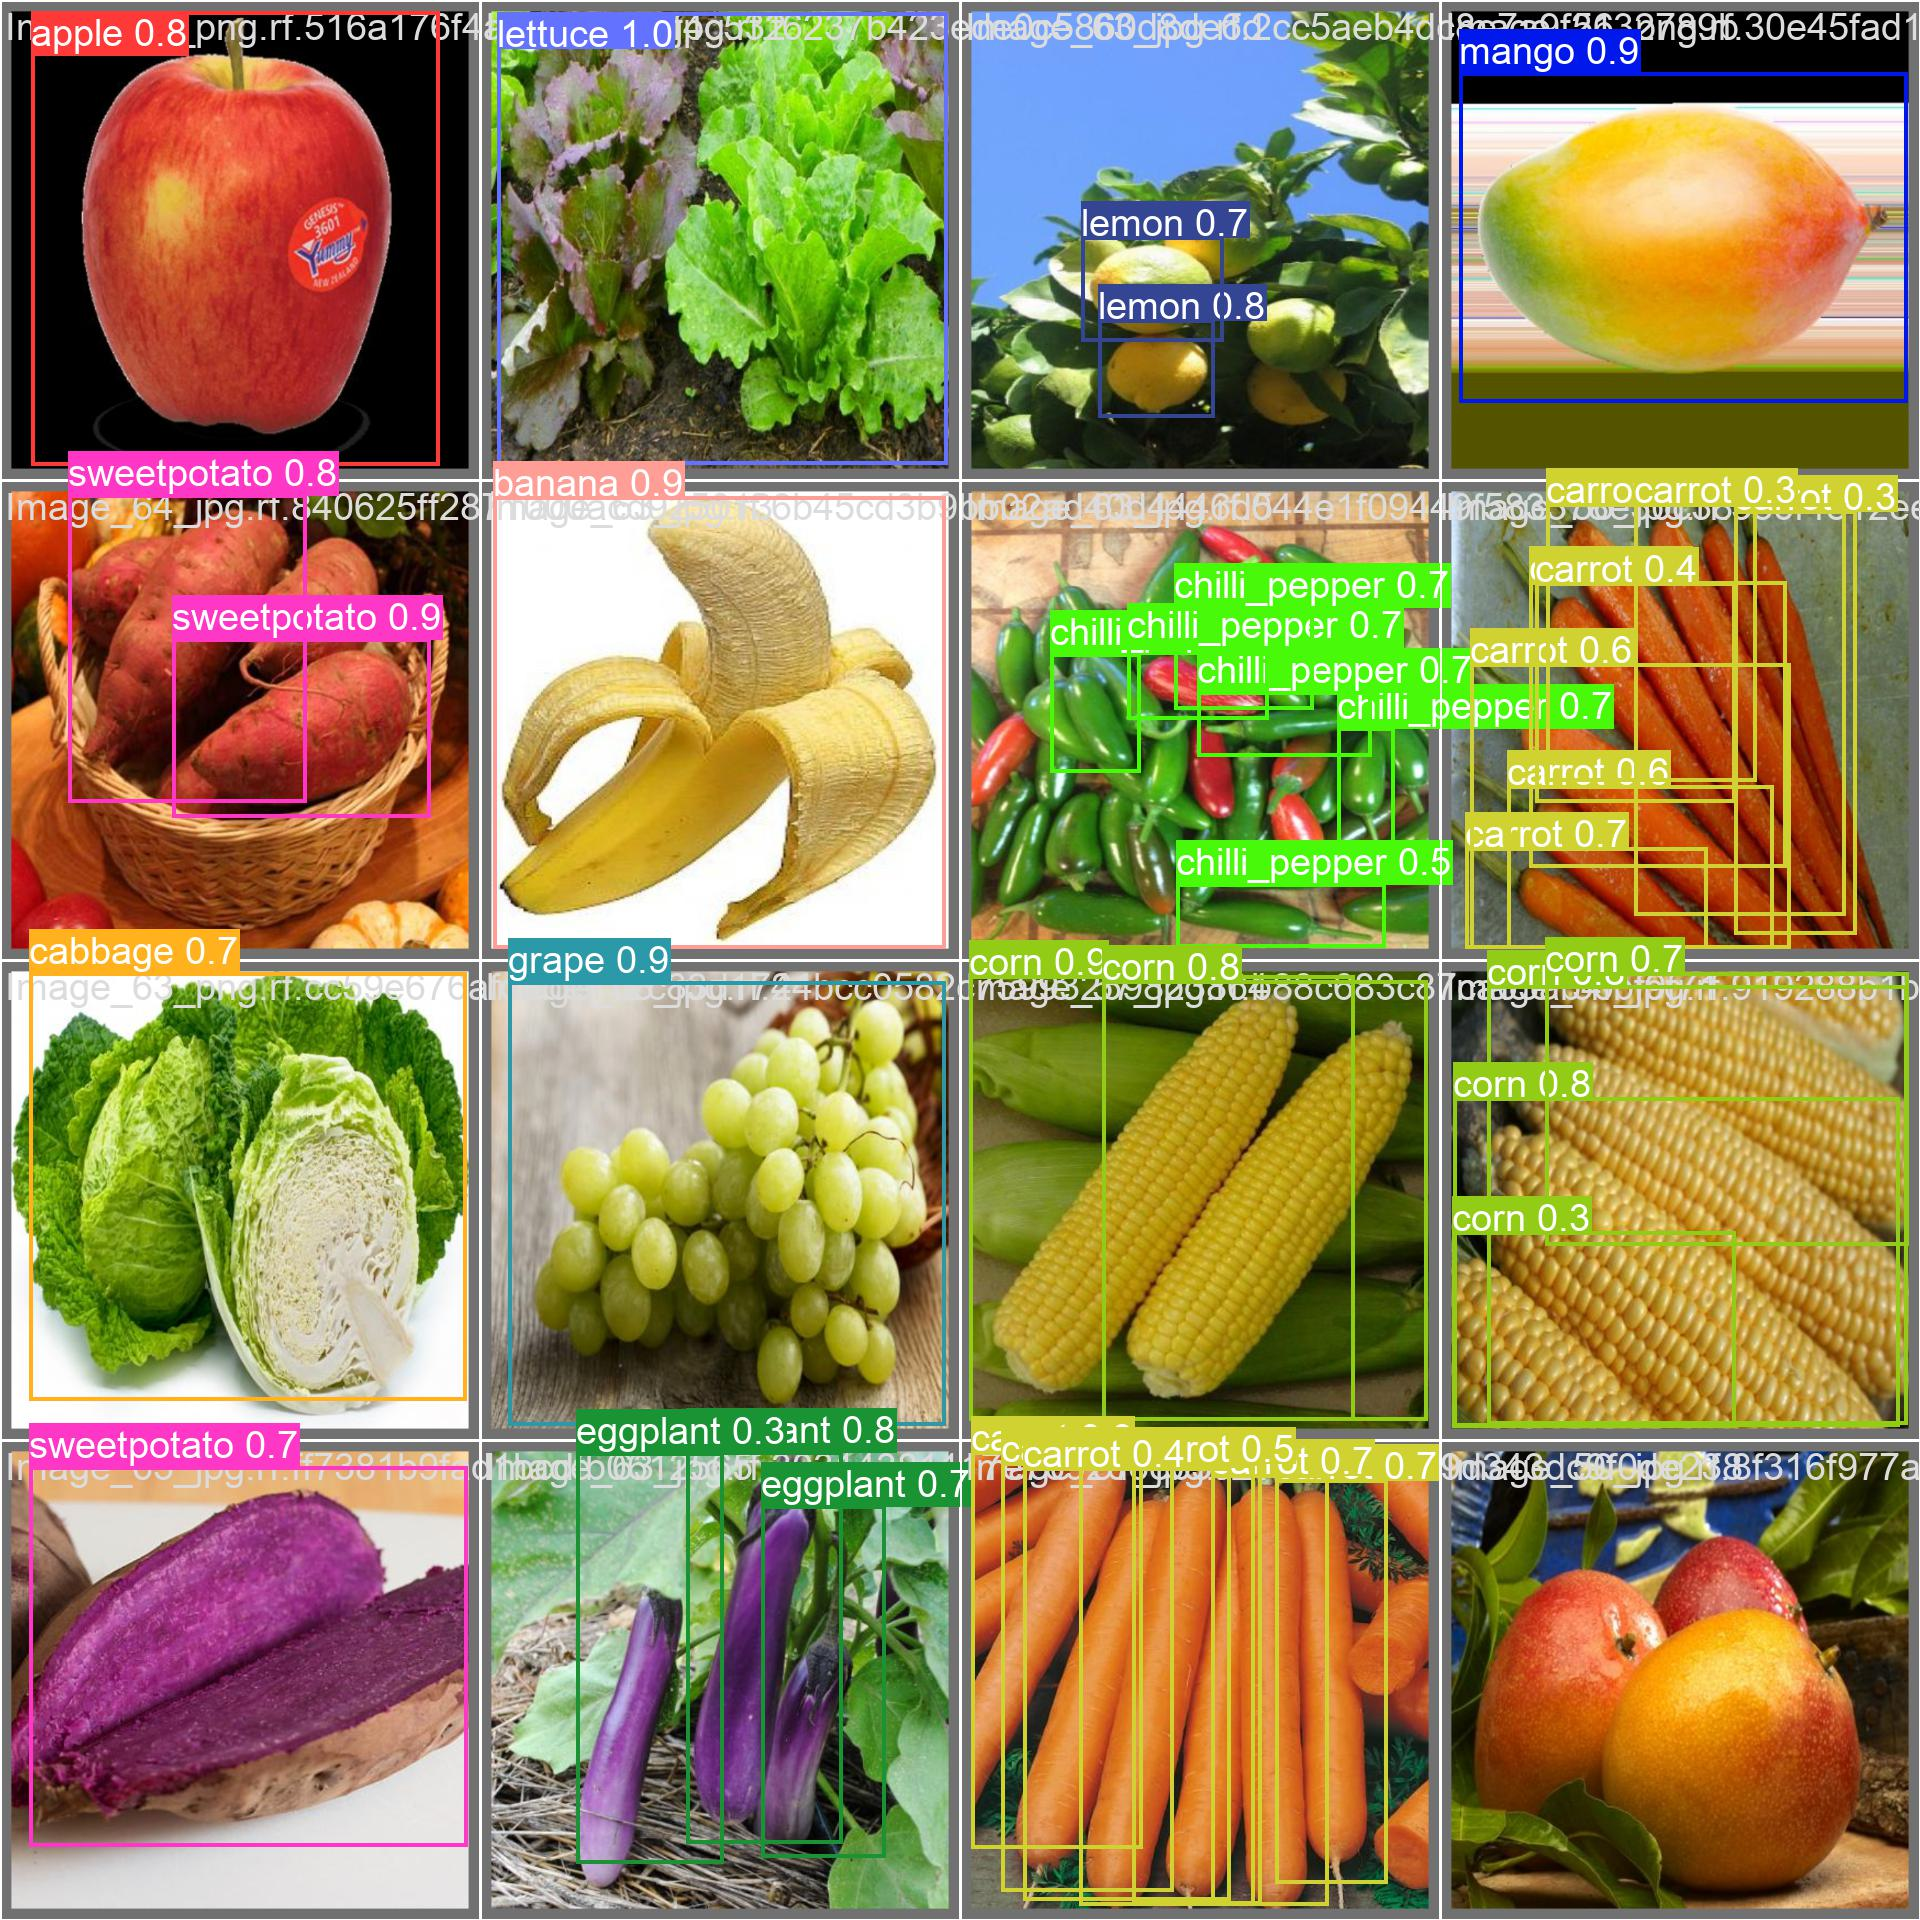

In [41]:
from IPython.display import display, Image

display(Image(filename='/kaggle/working/runs/detect/train/val_batch1_pred.jpg'))


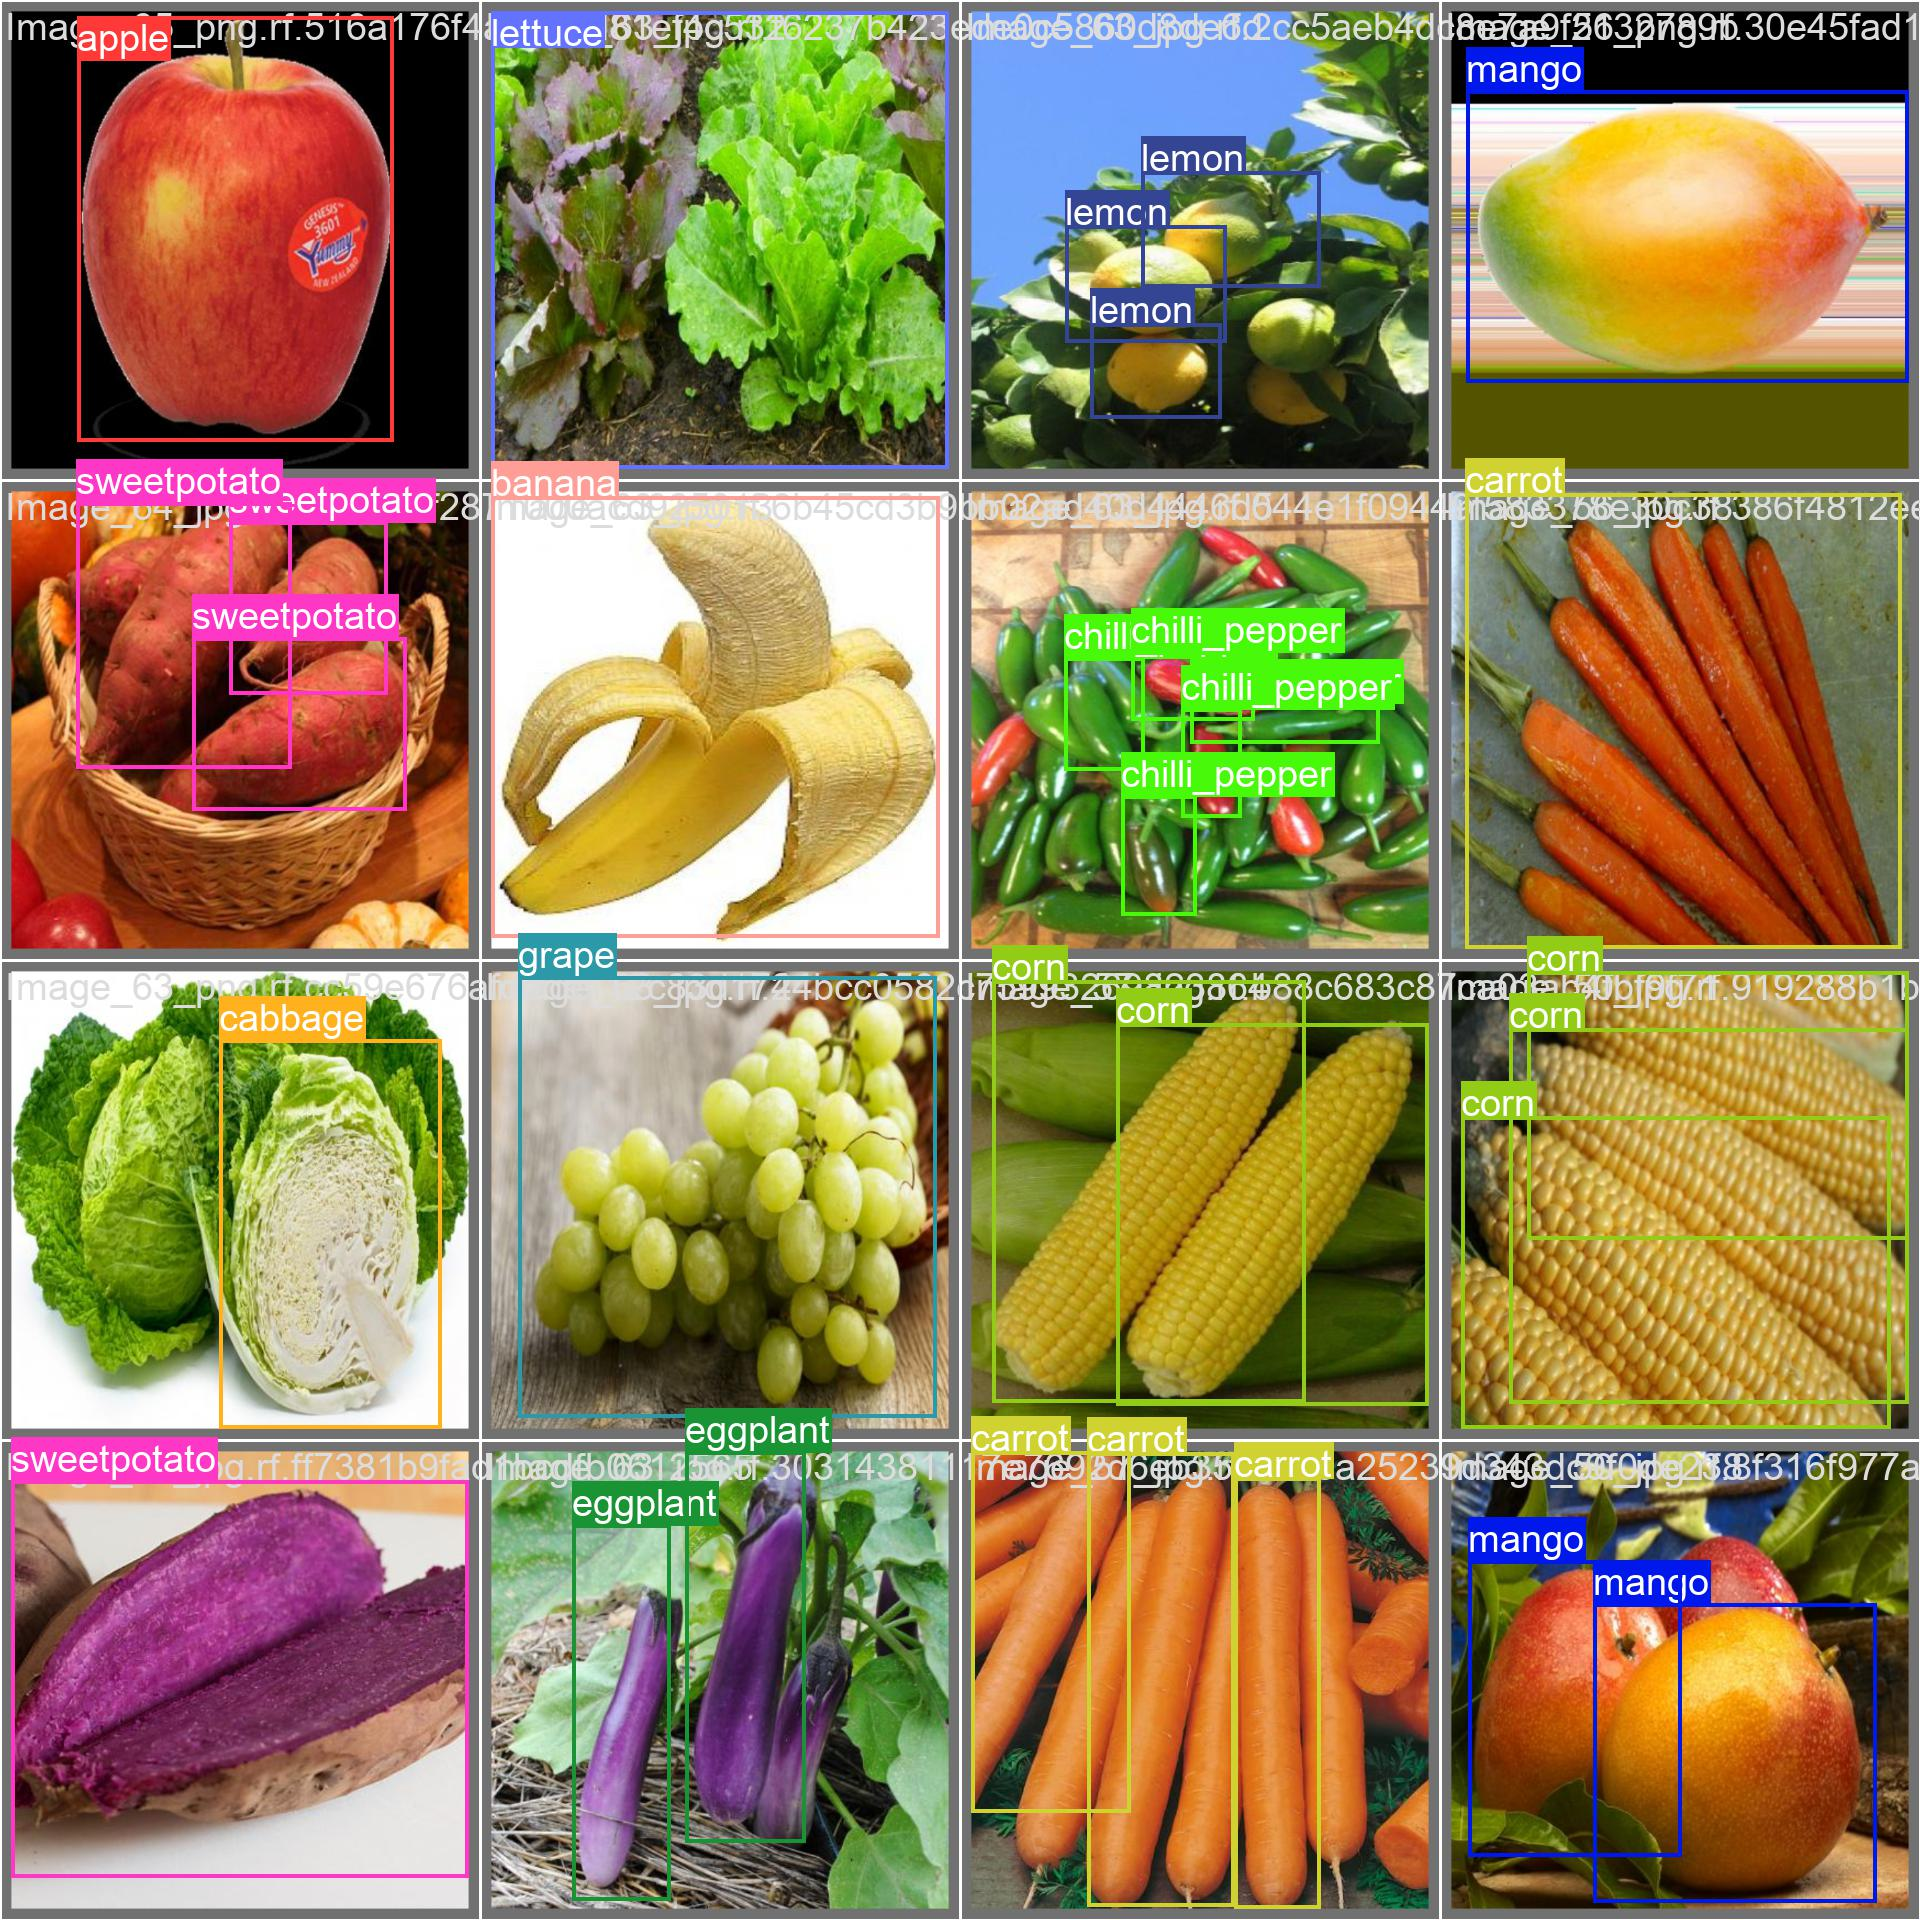

In [42]:
display(Image(filename='/kaggle/working/runs/detect/train/val_batch1_labels.jpg'))

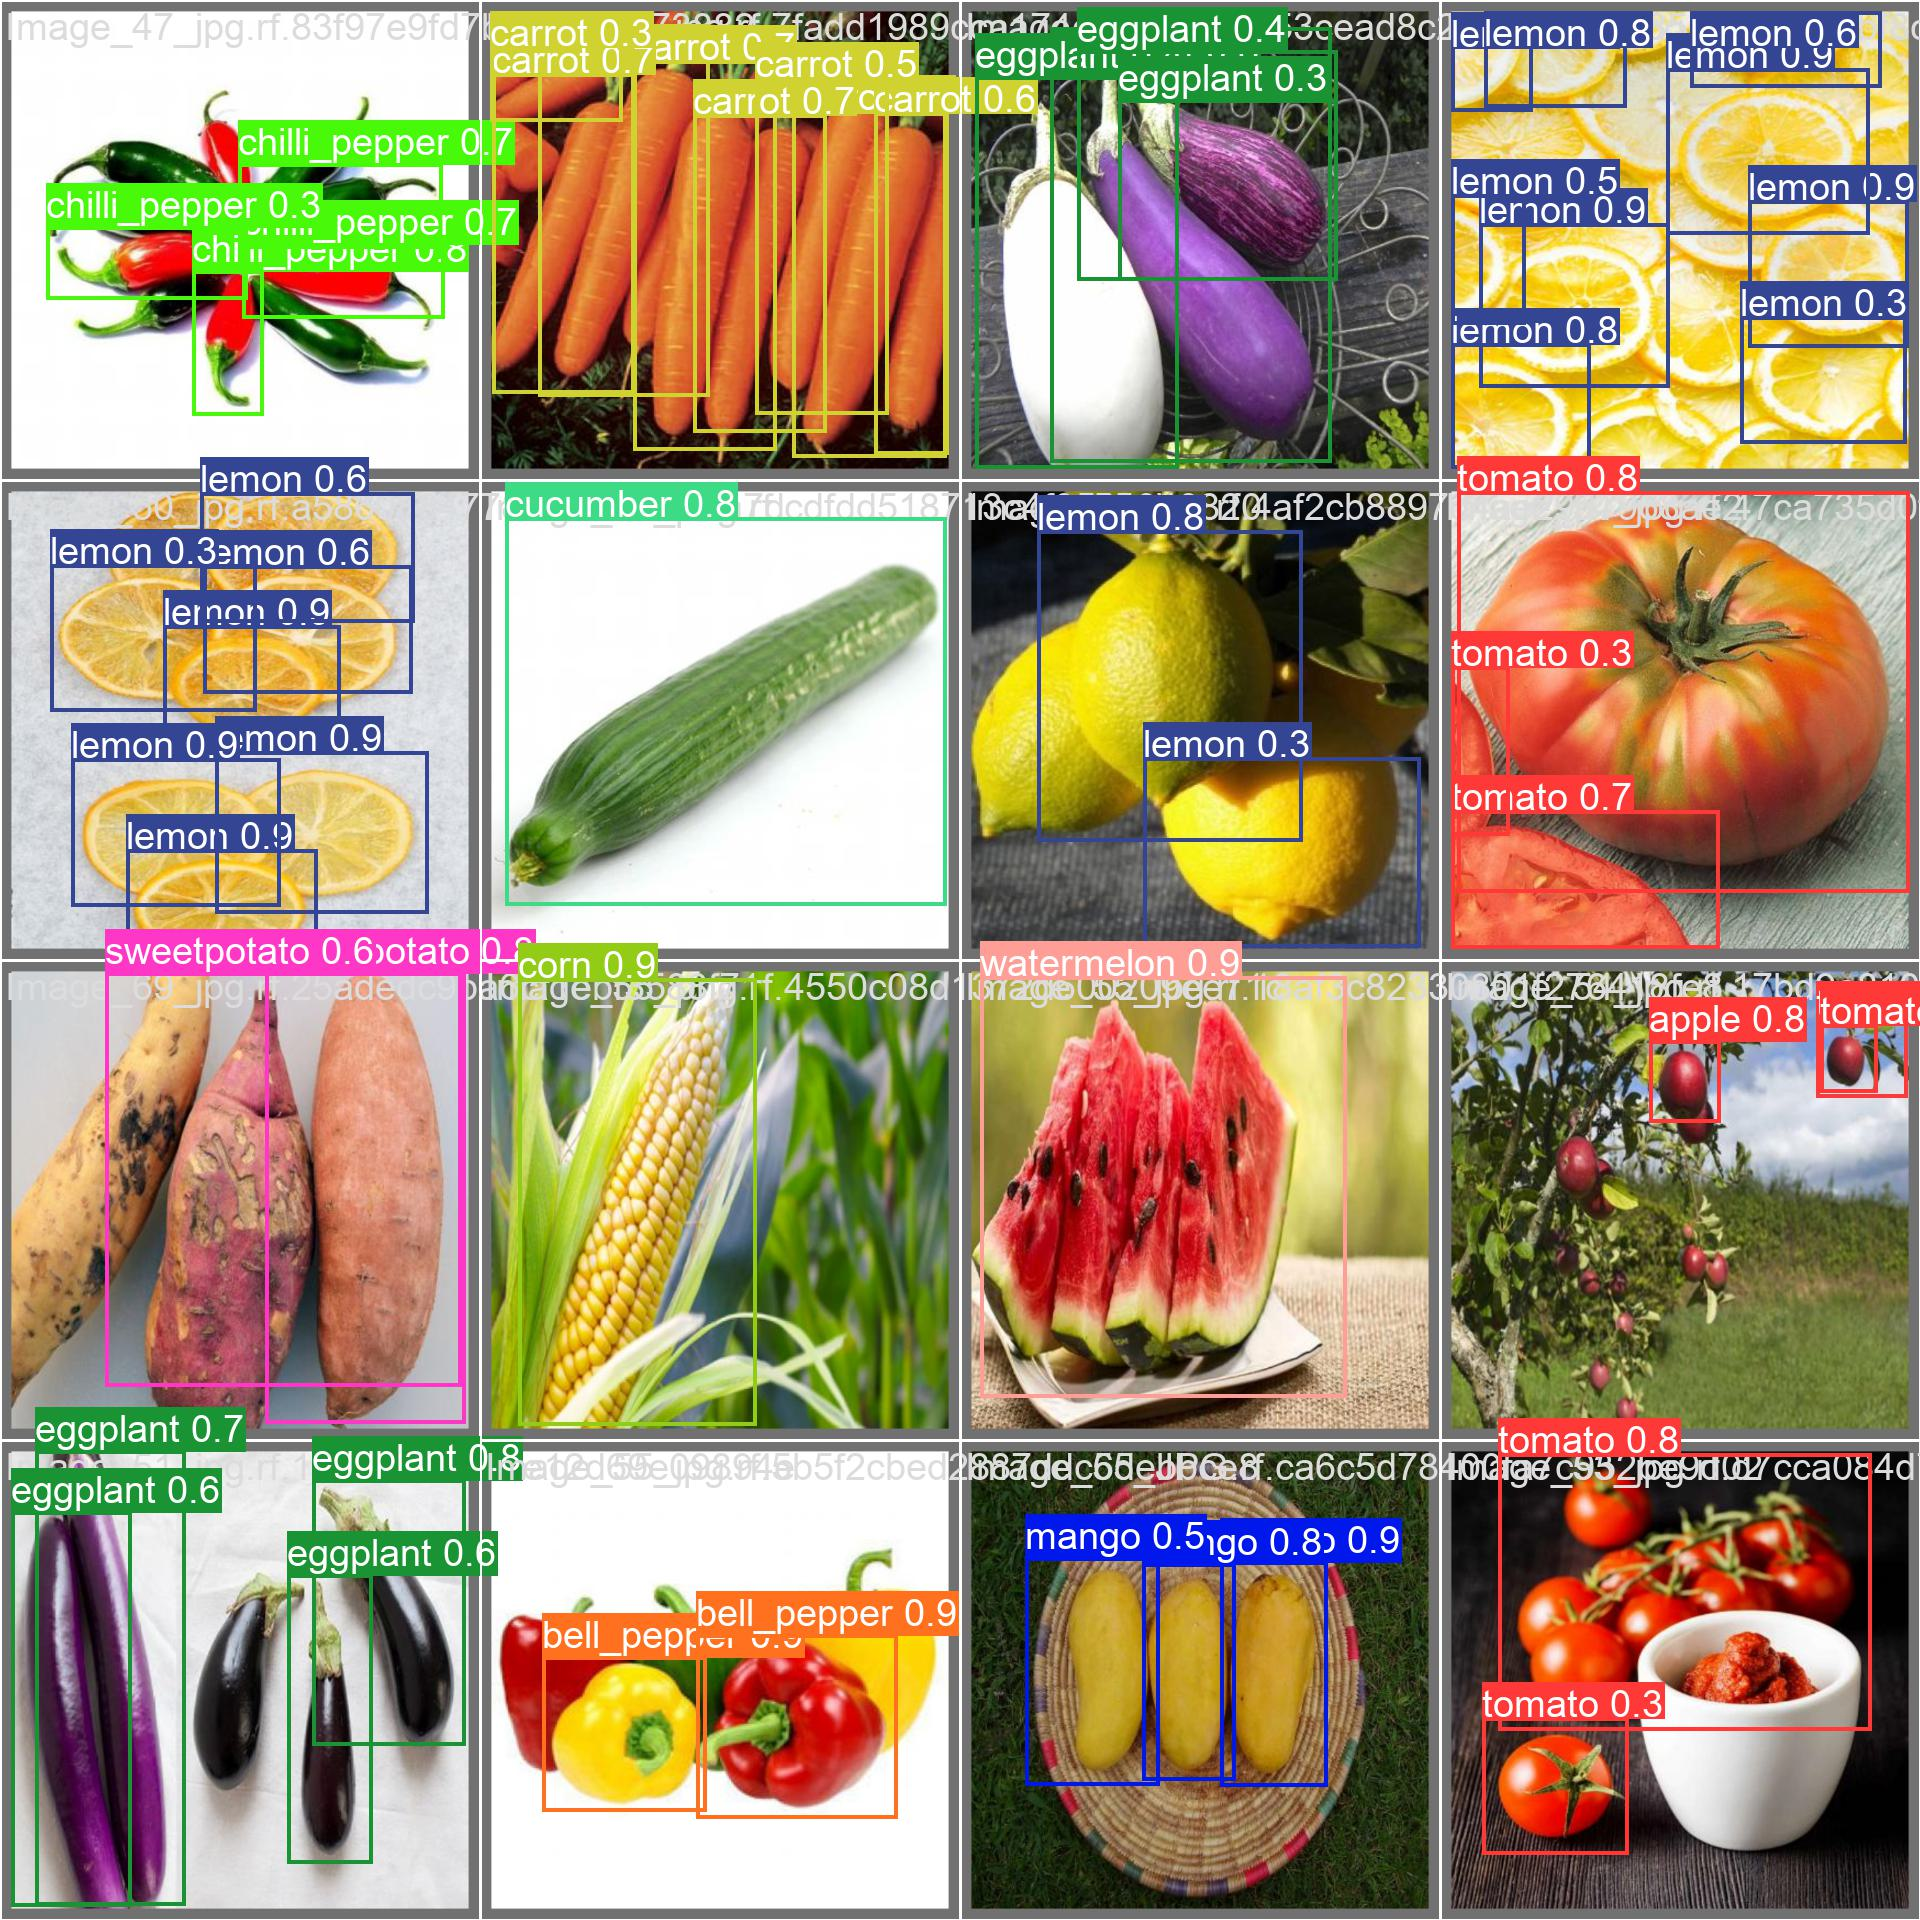

In [45]:
from IPython.display import display, Image

display(Image(filename='/kaggle/working/runs/detect/train/val_batch2_pred.jpg'))

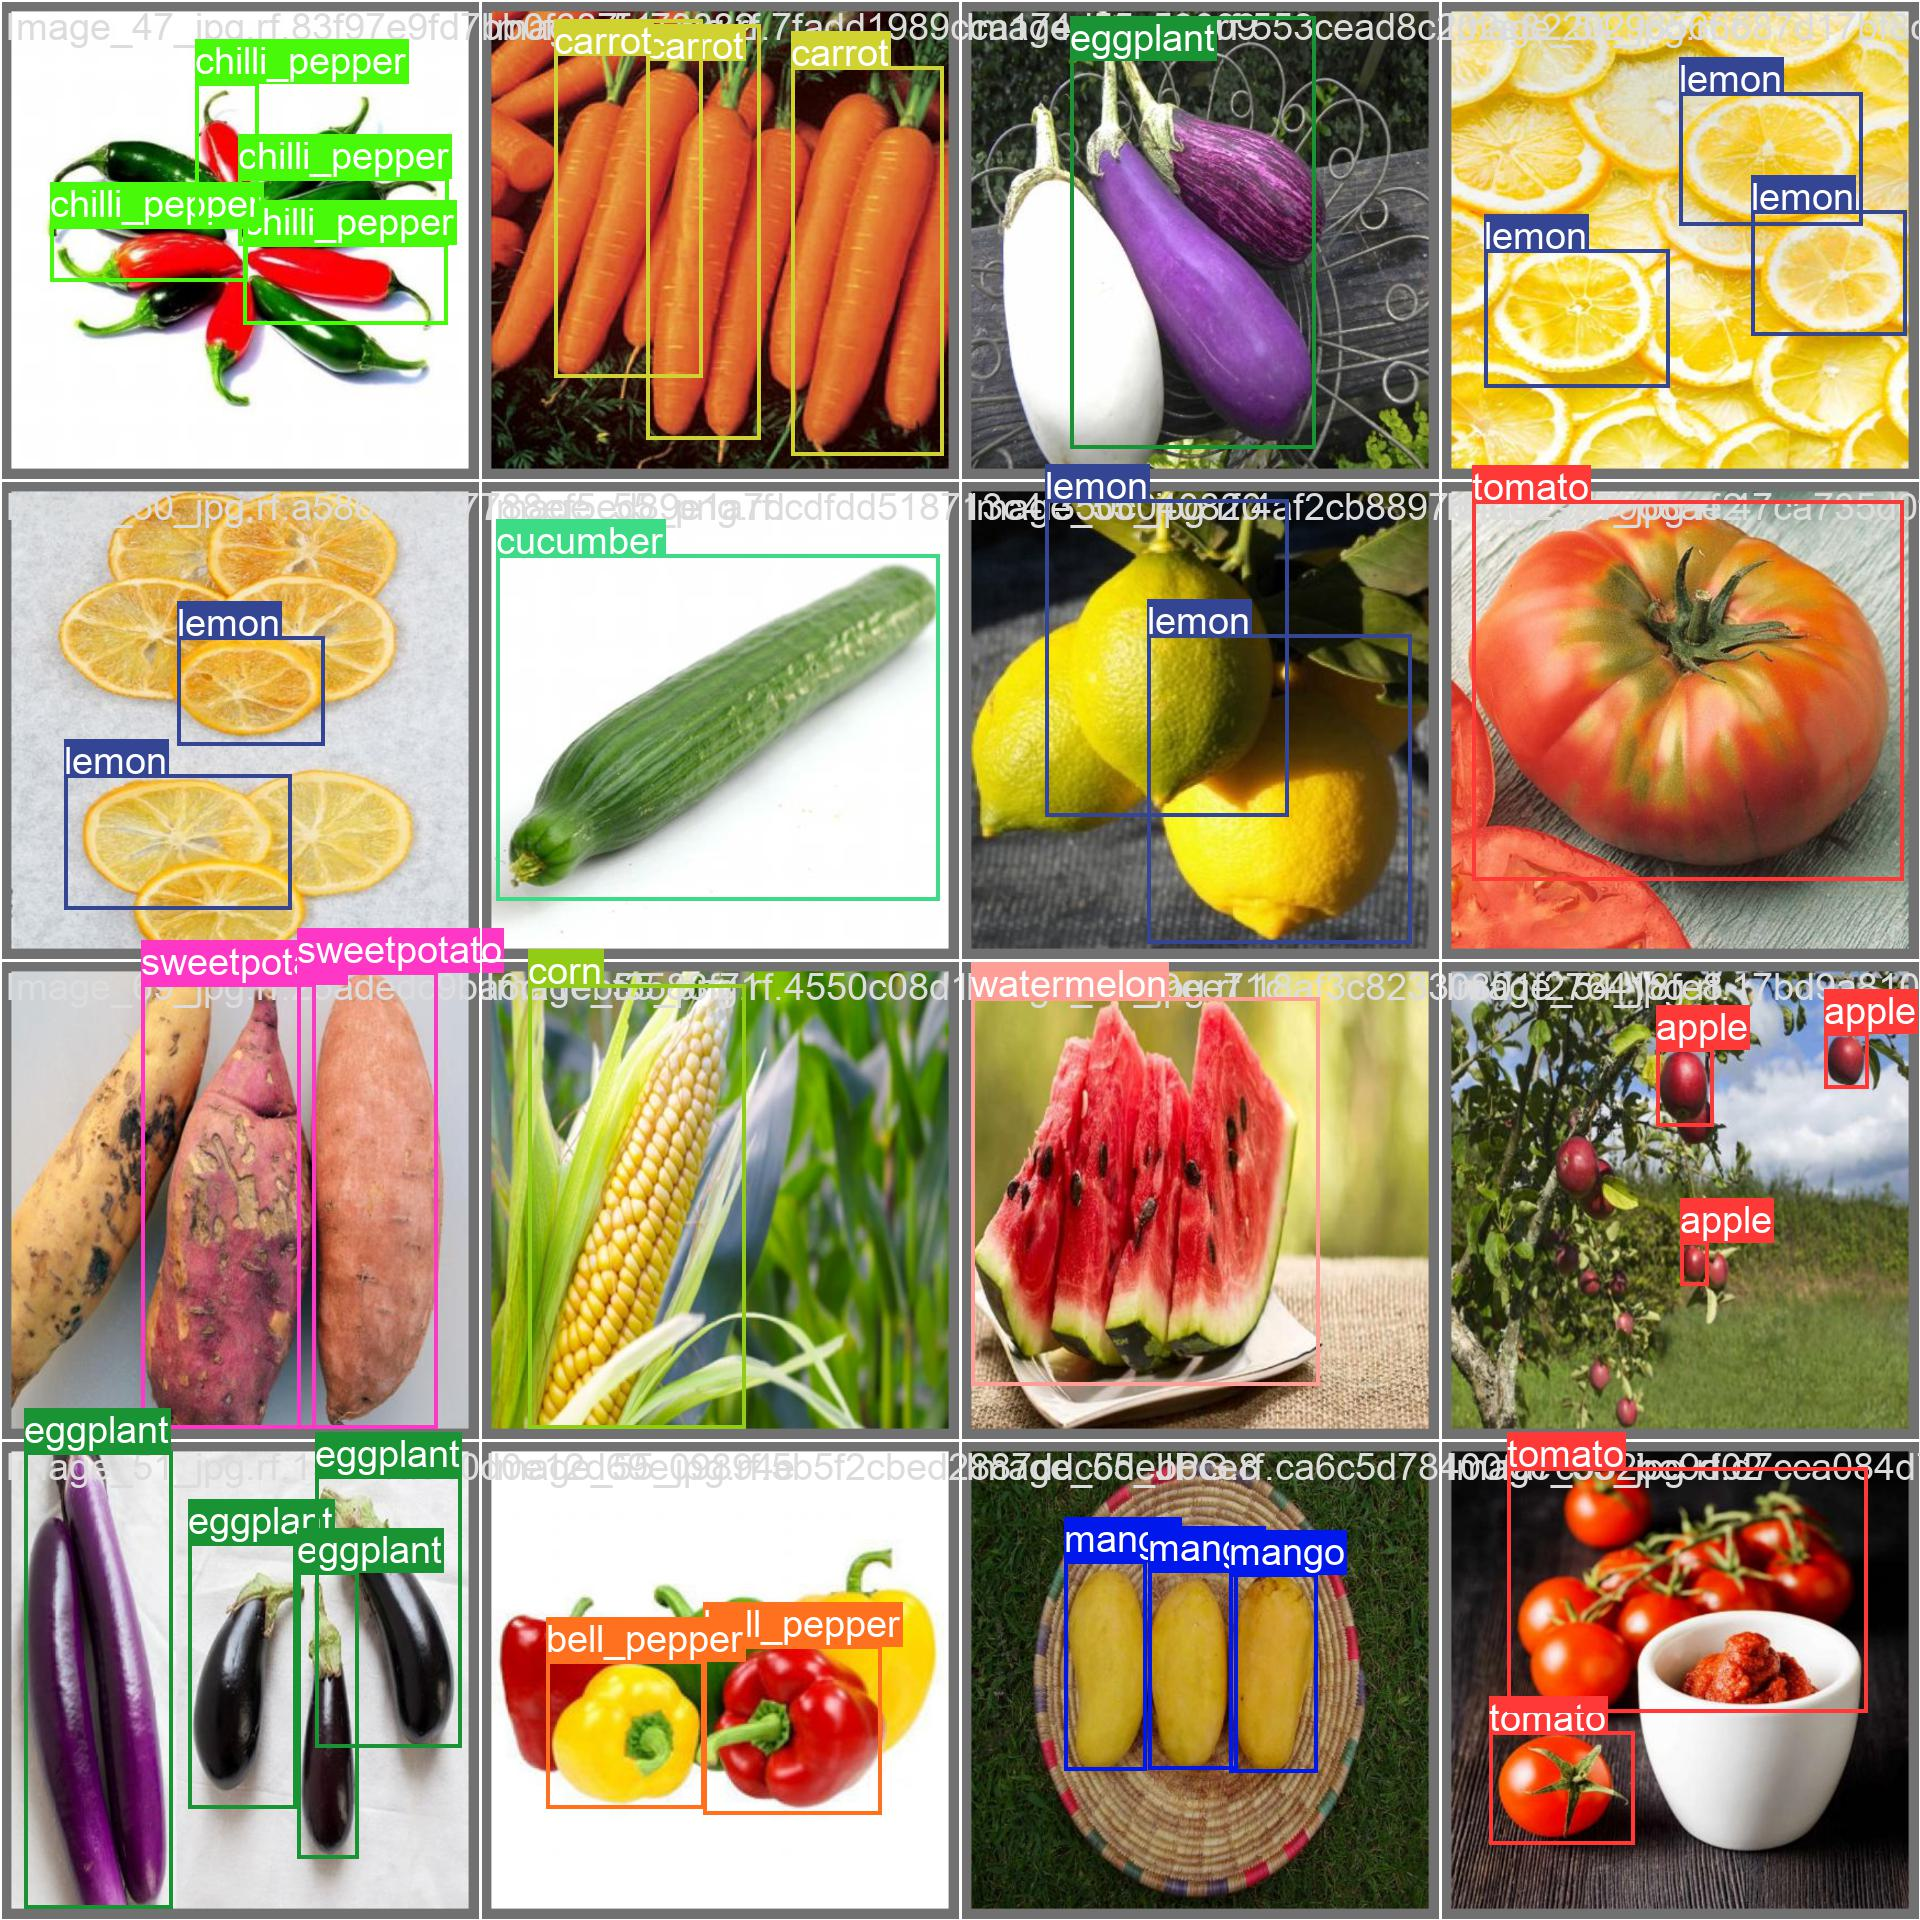

In [46]:
display(Image(filename='/kaggle/working/runs/detect/train/val_batch2_labels.jpg'))

In [34]:
from ultralytics import YOLO
from PIL import Image

import requests

url = 'https://www.hellozdrowie.pl/wp-content/uploads/2021/07/pomidory.jpg'
image = Image.open(requests.get(url, stream=True).raw)

model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")
results = model.predict(source=image, conf=0.2, save=True)  # save plotted images


0: 448x640 1 tomato, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


In [27]:
!ls /kaggle/working/runs/detect/predict

image0.jpg


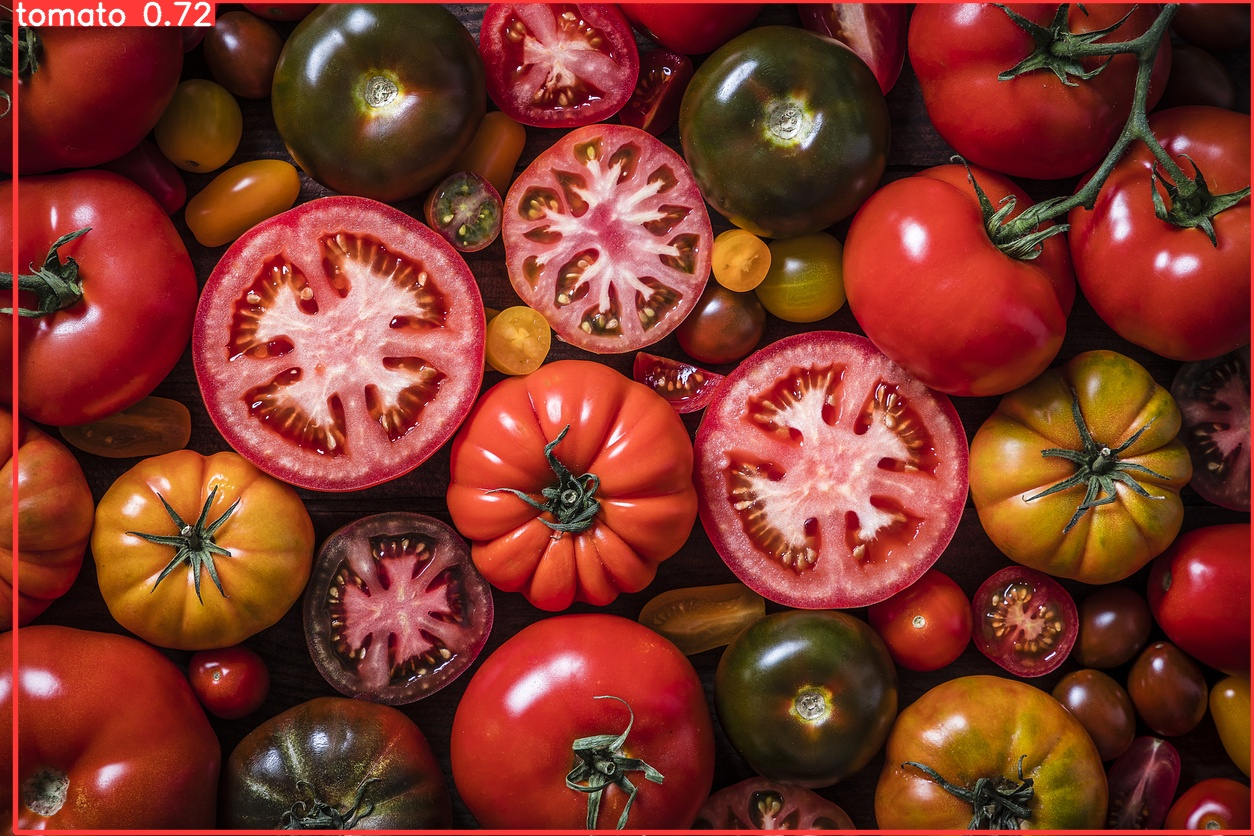

In [35]:
from IPython.display import display, Image
display(Image(filename='/kaggle/working/runs/detect/predict4/image0.jpg'))

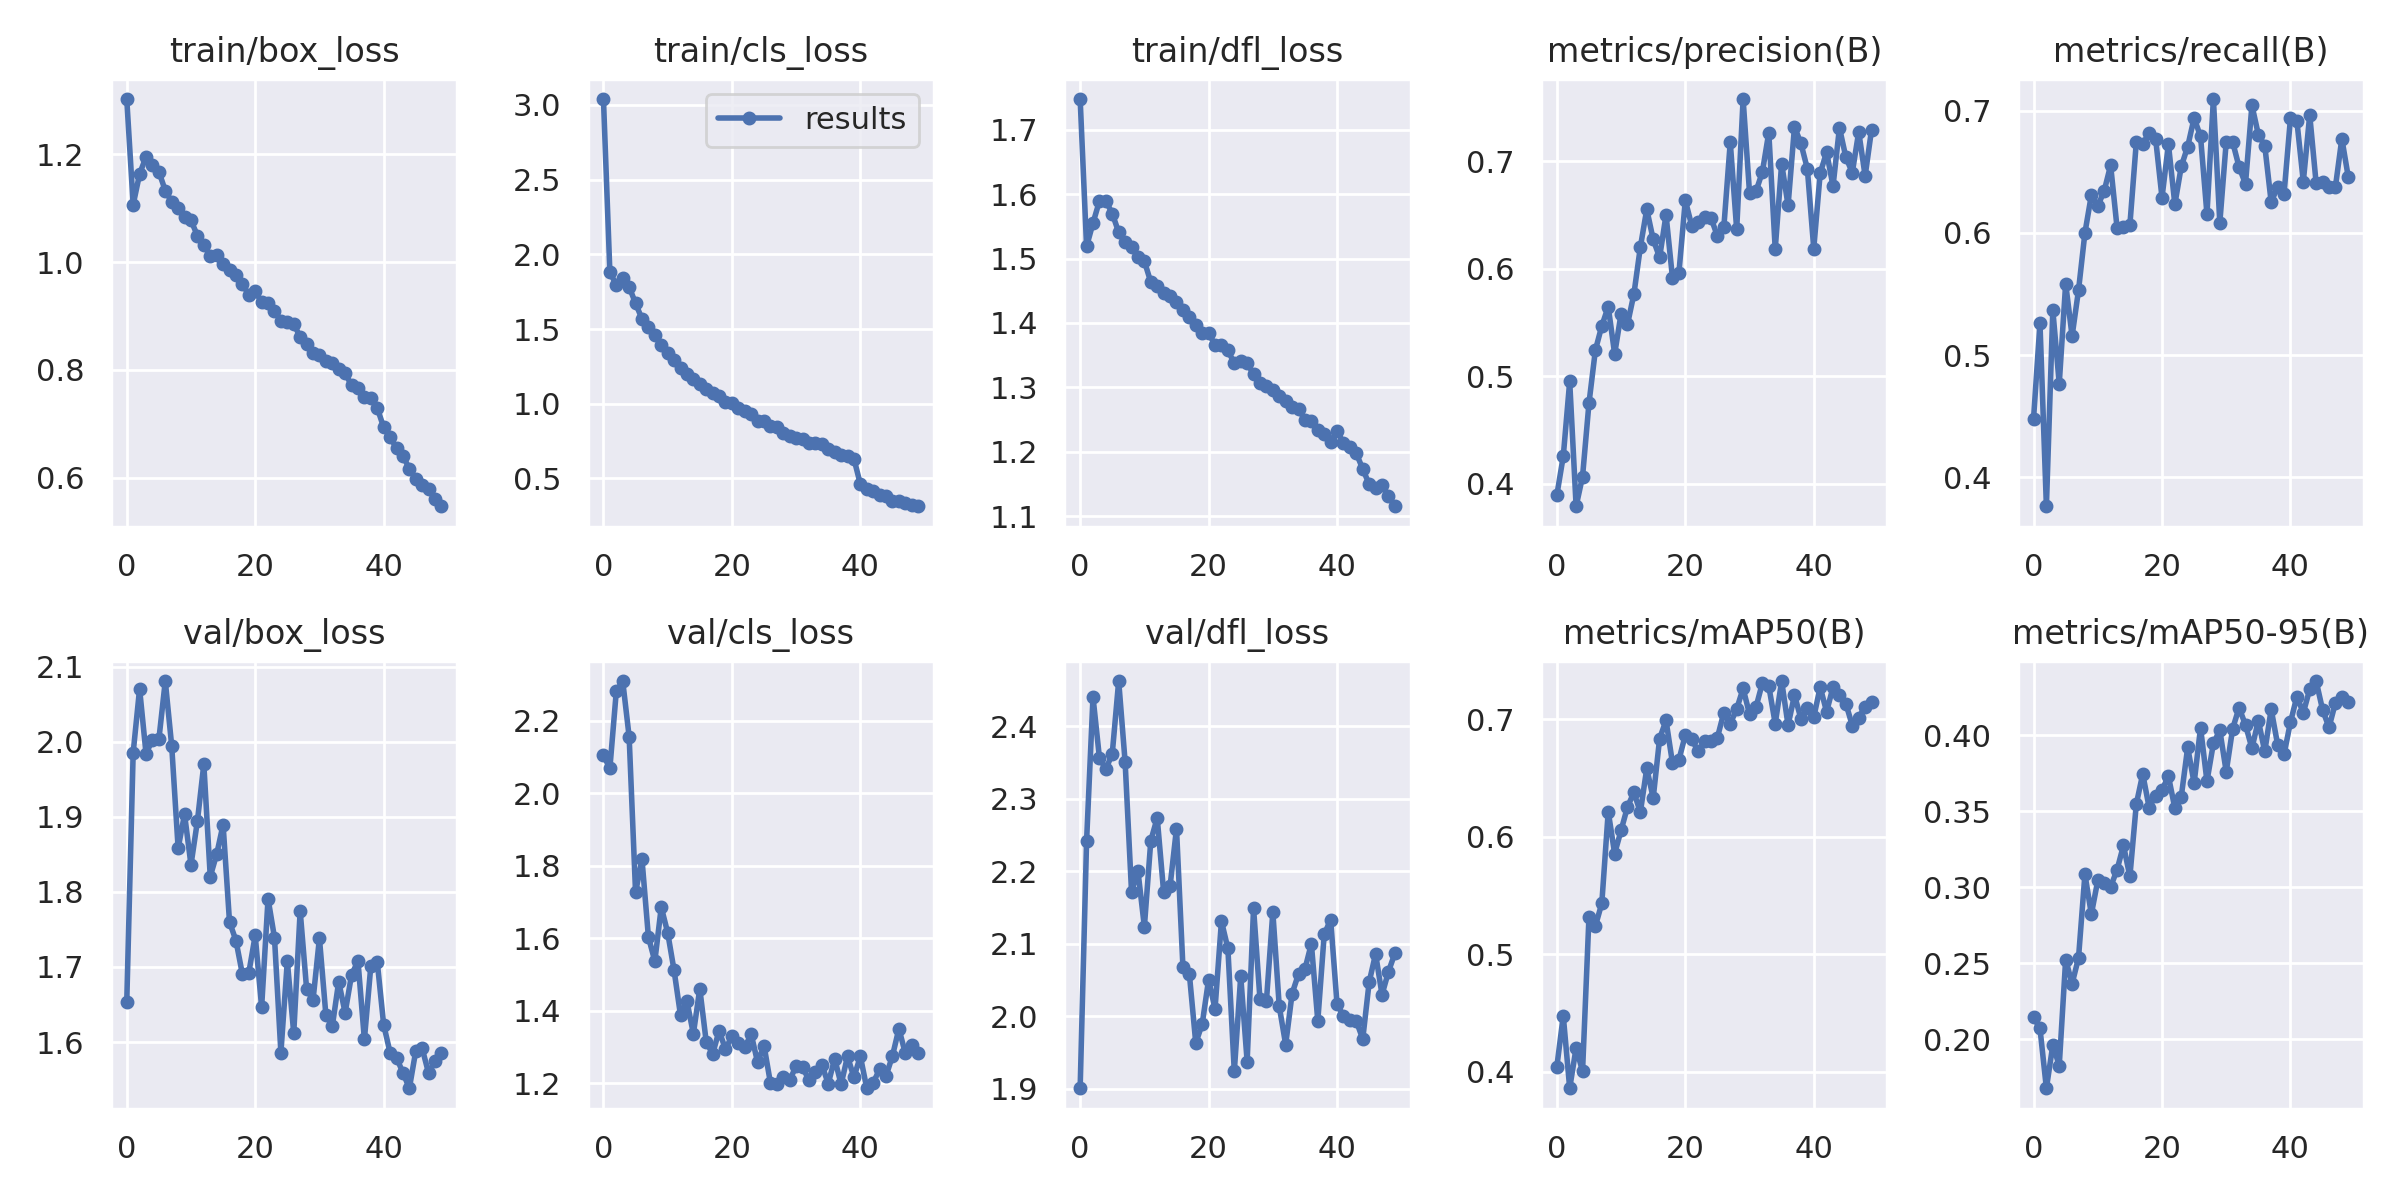

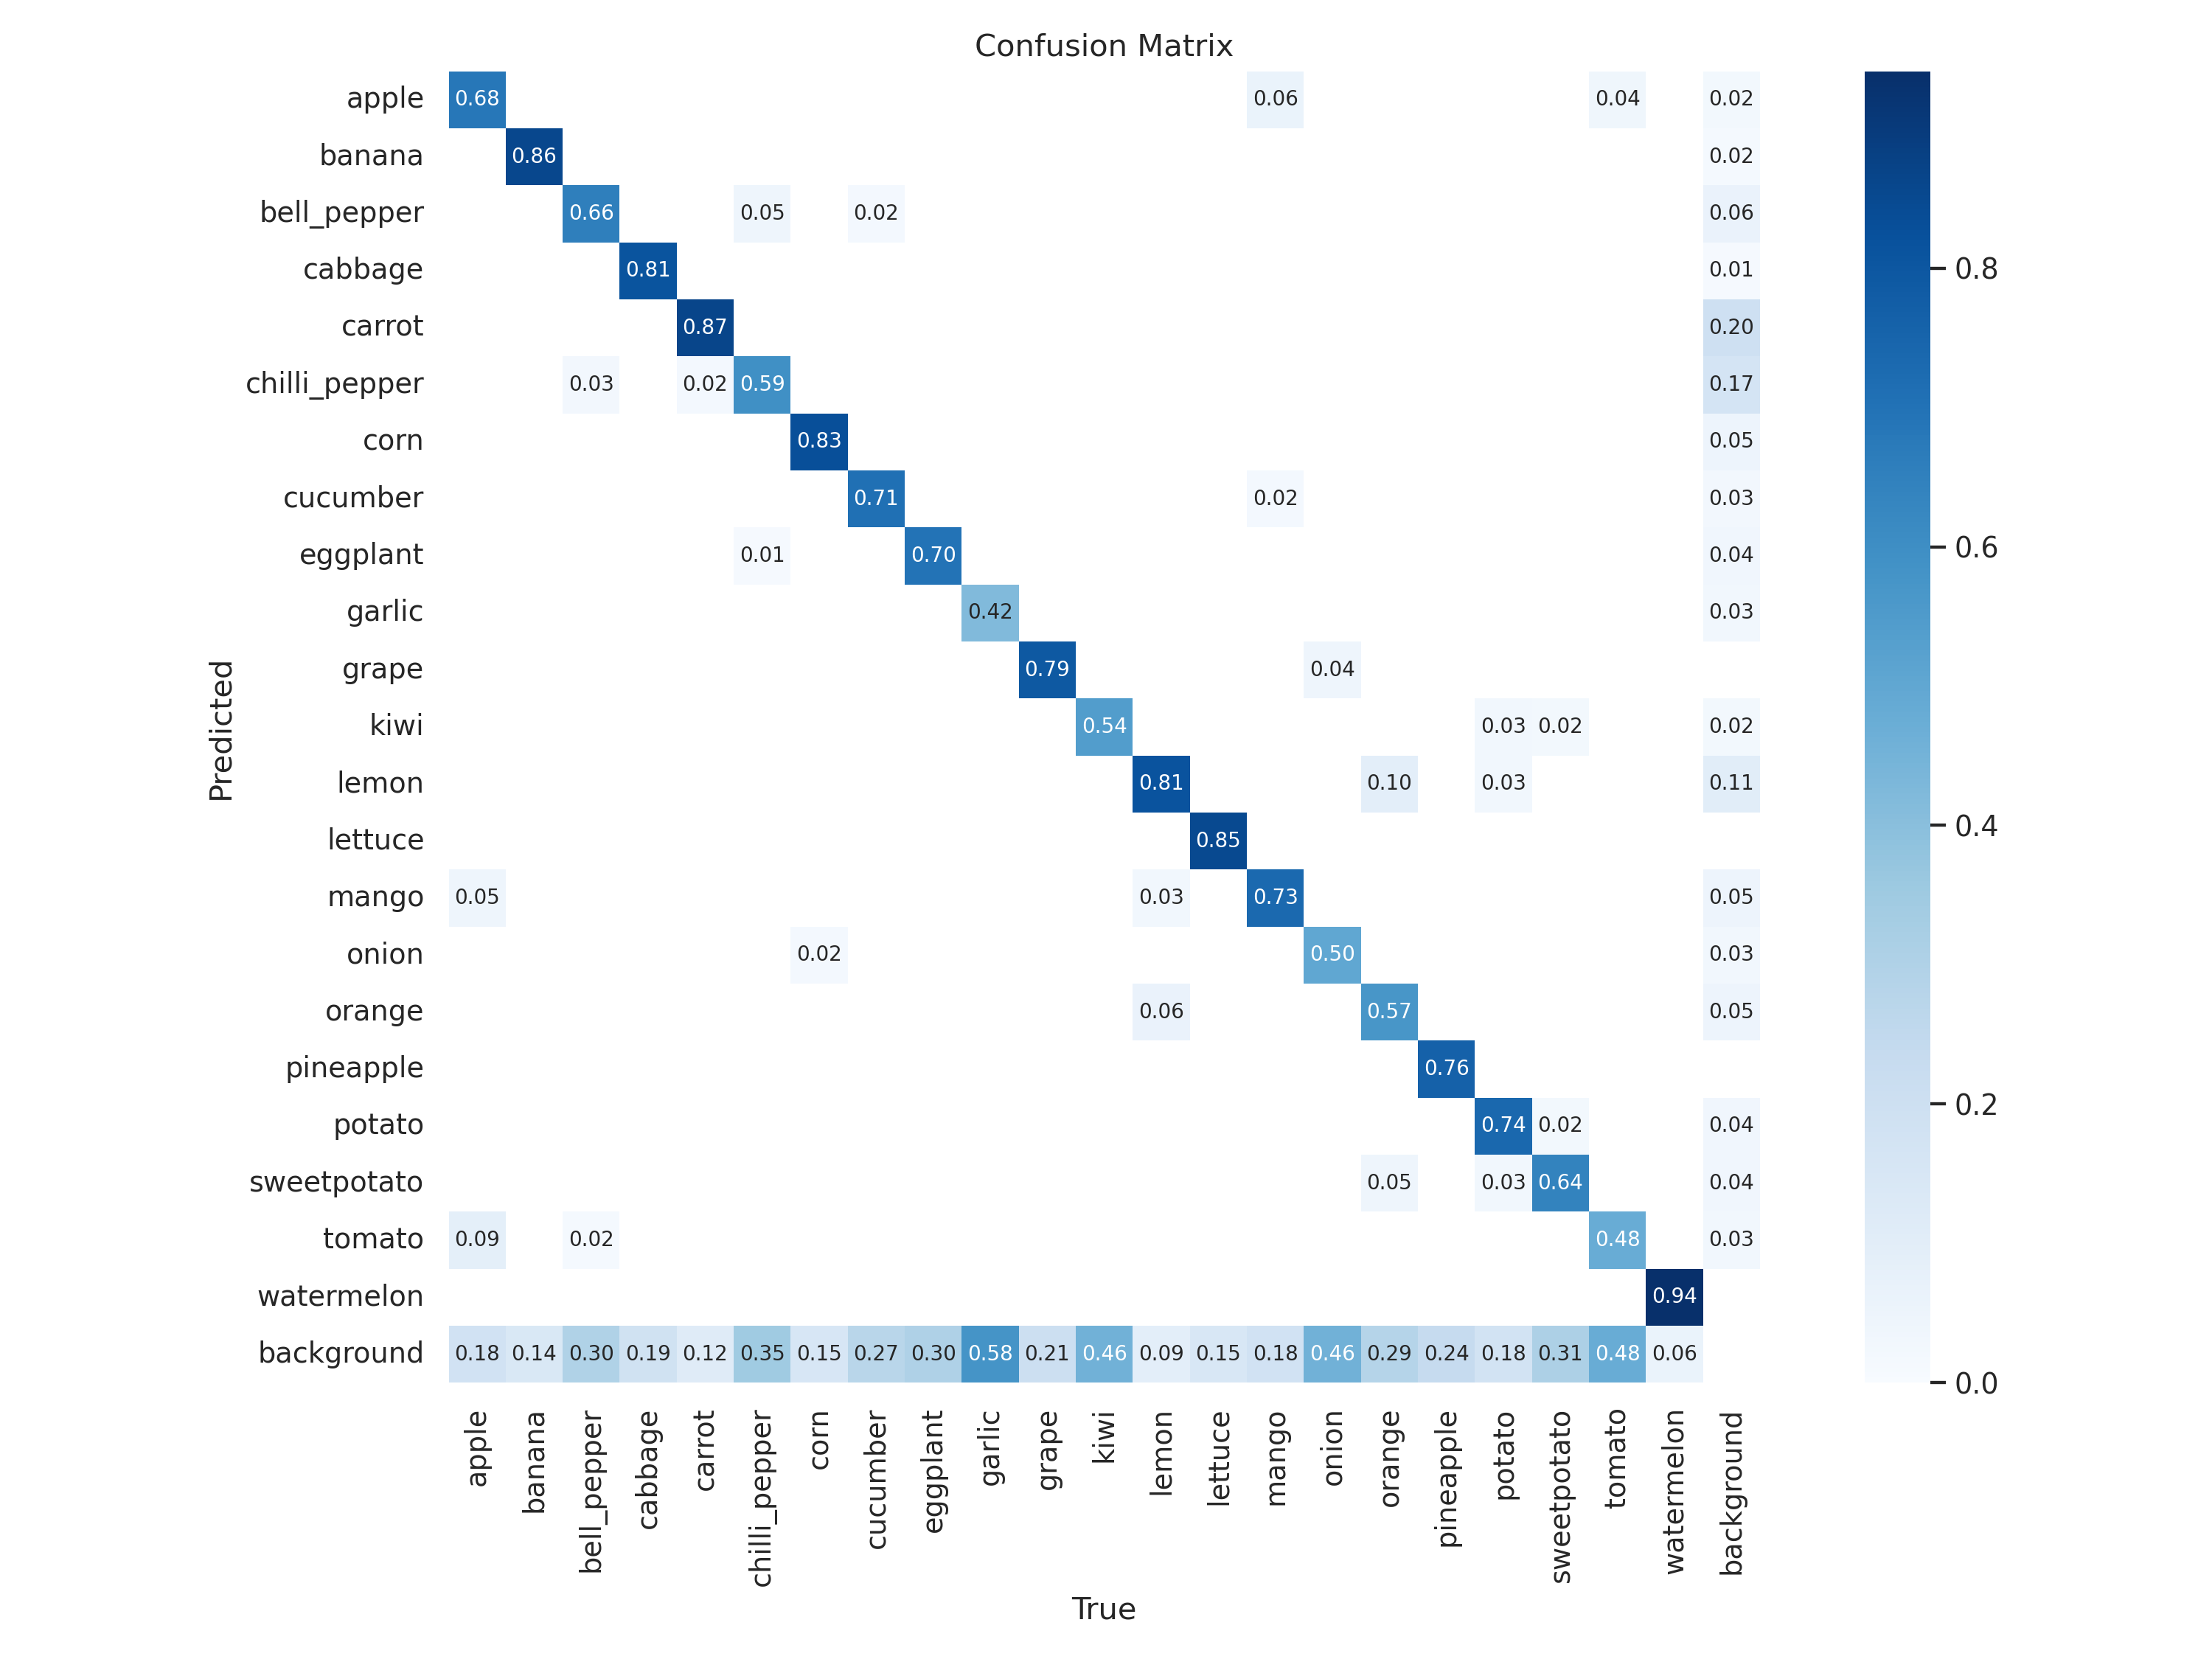

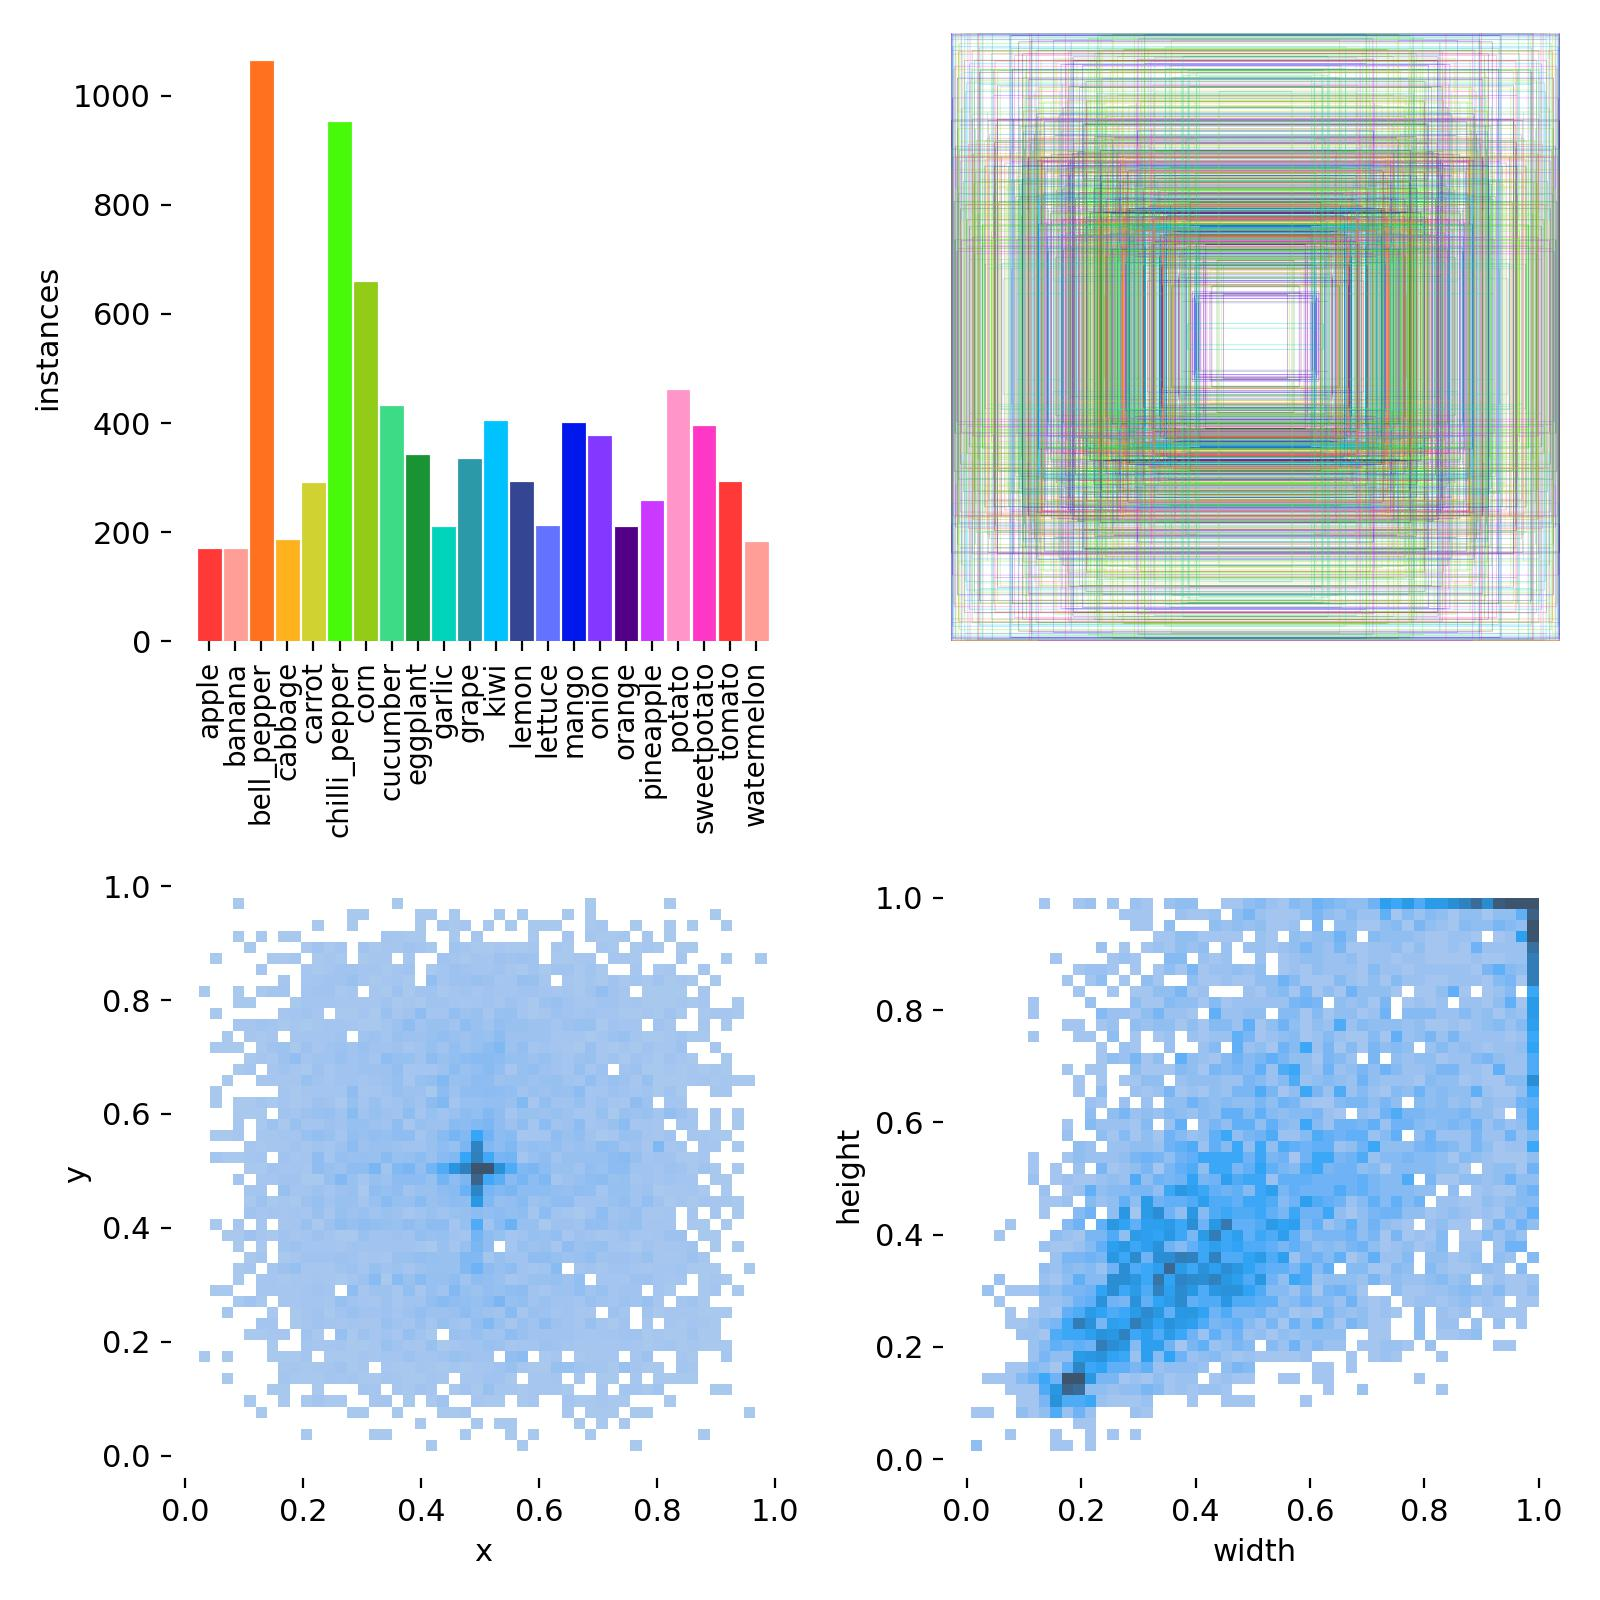

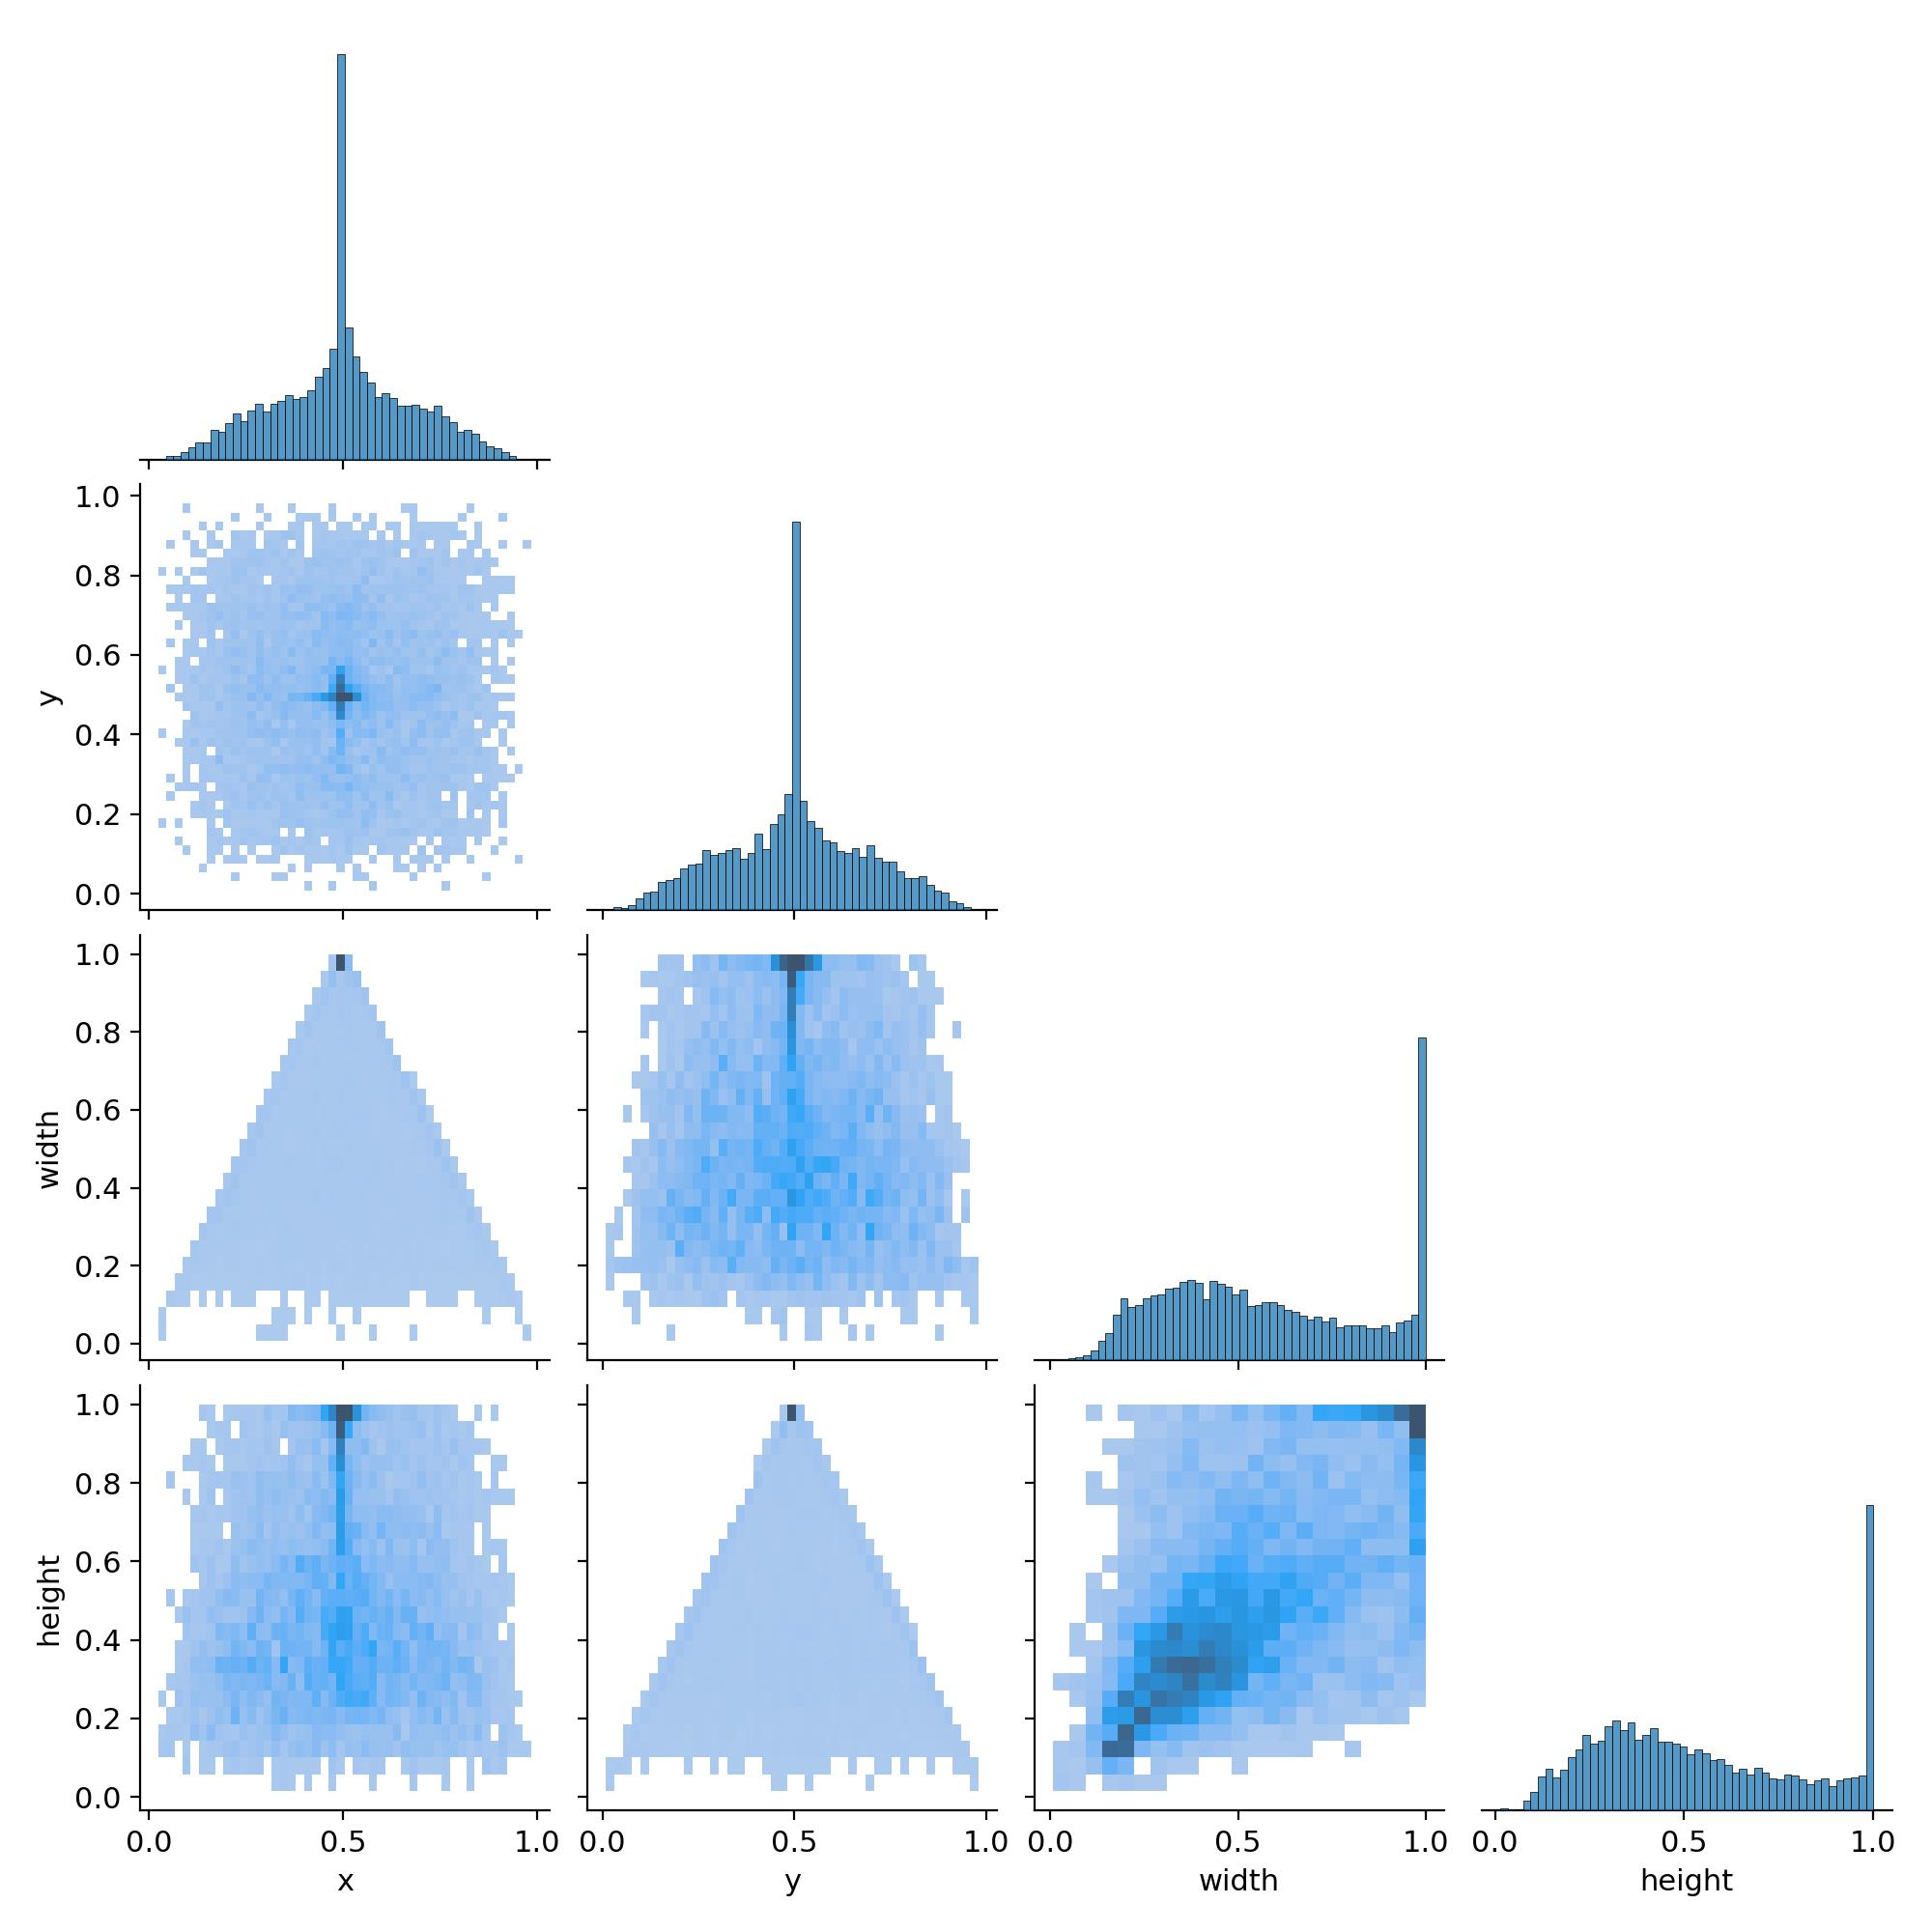

In [40]:
from IPython.display import display, Image

display(Image(filename='/kaggle/working/runs/detect/train/results.png'))
display(Image(filename='/kaggle/working/runs/detect/train/confusion_matrix.png'))
display(Image(filename='/kaggle/working/runs/detect/train/labels.jpg'))
display(Image(filename='/kaggle/working/runs/detect/train/labels_correlogram.jpg'))